# 🚗 Car Prediction



##👋 Introducción y descripción del dataset

Esta base de datos contiene datos detallados sobre diferentes modelos de autos usados a la venta, con sus características técnicas, equipamiento, precio y otra información relevante.

El dataset fue descargado desde kaggle: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge



###📘 Features


* ID: Identificador único de cada auto
* Price: Precio del auto
* Levy: Impuesto agregado al precio total
* Manufacturer: Fabricante del auto
* Model: Modelo del auto
* Prod. year: Año de producción del auto
* Category: Categoría del auto
* Leather interior: Si el interior es de cuero o no (Yes/No)
* Fuel type: Tipo de combustible
* Engine volume: Cilindrada del motor
* Mileage: El millaje del auto
* Cylinders: Cantidad de cilindros
* Gear box type: Tipo de caja de cambios (Automática, Manual, etc.)
* Drive wheels: Ruedas motrices (4x4, Tracción delantera, etc.)
* Doors: Cantidad de puertas
* Wheel: Ubicación del volante (Izquierda / Derecha)

* Color: Color del automóvil
* Airbags: Número de airbags



### 🤔 Objetivos del estudio

- Predecir el precio de un automóvil en función de sus características (año, kilometraje, cilindrada, etc.)

- Descubrir que variables son importantes para predecir el precio de un auto

- Analizar tendencias de precio por marca, modelo, categoría.

- Estudiar el impacto de ciertas características (transmisión, combustible, etc.) en el precio.


### 🤓 Hipótesis
Se hipotetiza que:



* El precio del automóvil está fuertemente correlacionado con el año de producción, el millaje y el tamaño del motor.

* El tipo de combustible (gasolina, diésel, híbrido) impacta significativamente en el precio.
* La transmisión automática (caja de cambios) aumenta el precio en comparación con la transmisión manual.
*  Características como cuero interior, número de airbags y ruedas 4x4 están asociadas a precios más elevados.
* El precio disminuye a medida que aumenta el kilometraje, pero en mayor o menor medida dependiendo de la antigüedad del vehículo.
* Existen relaciones entre ciertas variables (por ejemplo, motores más grandes suelen ir con vehículos más nuevos y mayor equipamiento).
* Ciertos colores o categorías podrían tener mayor precio que otros.




##🖥️ Importación de bibliotecas y datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Para normalización / preprocesamiento
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
!pip install category_encoders
from category_encoders import LeaveOneOutEncoder

#Modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.tree import DecisionTreeRegressor


# Herramientas tratamiento OverFitting
from sklearn import datasets, metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve

# Warnings a saltar
warnings.filterwarnings('ignore')



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.0 MB/s eta 0:00:00


In [2]:
#Lectura database
df = pd.read_csv('https://raw.githubusercontent.com/JotaLeutgeb/proyectofinalDS1/main/Car_Prediction/car_price_prediction.csv')


## 🔎 Análisis exploratorio (EDA)

In [3]:
df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
# Verificación de nulos
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

Ninguna fila con datos nulos.

In [6]:
# Verificación de cuantos valores únicos tienen las variables
for col in df.columns:
    print(f"Columna {col} : {df[col].nunique()}")
    print("----"*9)

Columna ID : 18924
------------------------------------
Columna Price : 2315
------------------------------------
Columna Levy : 559
------------------------------------
Columna Manufacturer : 65
------------------------------------
Columna Model : 1590
------------------------------------
Columna Prod. year : 54
------------------------------------
Columna Category : 11
------------------------------------
Columna Leather interior : 2
------------------------------------
Columna Fuel type : 7
------------------------------------
Columna Engine volume : 107
------------------------------------
Columna Mileage : 7687
------------------------------------
Columna Cylinders : 13
------------------------------------
Columna Gear box type : 4
------------------------------------
Columna Drive wheels : 3
------------------------------------
Columna Doors : 3
------------------------------------
Columna Wheel : 2
------------------------------------
Columna Color : 16
-------------------------

In [7]:
# Verificación de qué valores únicos tienen las variables
for col in df.columns:
    print(f'Valores únicos de {col}:\n {df[col].unique()}\n')
    print('--'*40)

Valores únicos de ID:
 [45654403 44731507 45774419 ... 45804997 45793526 45813273]

--------------------------------------------------------------------------------
Valores únicos de Price:
 [13328 16621  8467 ... 56814 63886 22075]

--------------------------------------------------------------------------------
Valores únicos de Levy:
 ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598'

In [8]:
# Estadísticas generales de las columnas numéricas
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


### 💡 Conclusiones luego del EDA

Se identificaron varios valores con formatos incorrectos en las siguientes columnas:


*   Levy: el valor "-" es incorrecto ya que esta debe ser una columna numérica
*   Engine_volume: Se ve que varios campos tienen la palabra "turbo"
*   Mileage: Se debe hacer una columna numérica trundando el "km"
*   Cylinders:
  * Los valores se muestran como float pero son todos enteros
  * Los 3 cuartiles (25%, 50%,75%) tienen el mismo valor, hay que verificar si el máximo hay queconsiderarlo outlier o dejarlo en el análisis
*   Doors: Está en el formato incorrecto, esto debe indicar la cantidad de peurtas.
*   Price: El mínimo y el máximo parecen ser incorrectos considerando la distribución en los cuartiles (posibles outliers).






### 📚 Organización y cambios preliminares en columnas

In [9]:
# Paso previo para buena práctica en nombres de columnas
df.rename(columns={'Prod. year': 'Prod year'}, inplace=True)

In [10]:
# Reemplazamos todos los espacios en las columnas por "_"
df.columns = [col.replace(' ', '_') for col in df.columns]

In [11]:
#Vistazo general para veríficar como quedar las columnas definitivamente.
df.columns.tolist()

['ID',
 'Price',
 'Levy',
 'Manufacturer',
 'Model',
 'Prod_year',
 'Category',
 'Leather_interior',
 'Fuel_type',
 'Engine_volume',
 'Mileage',
 'Cylinders',
 'Gear_box_type',
 'Drive_wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags']

***Columnas organizadas ✅***

## 🧹 Limpieza

### 🧹 Limpieza general del *DataFrame*

In [12]:
# Contamos cantidad de filas duplicadas
df.duplicated().sum()

313

In [13]:
# Eliminamos las filas duplicadas
df.drop_duplicates(inplace=True)

Filas duplicadas eliminadas ✅

In [14]:
#Dropeamos ID
df = df.drop(['ID'],axis=1)

Eliminación de la columna `'ID'`, ya que tenemos una por defecto

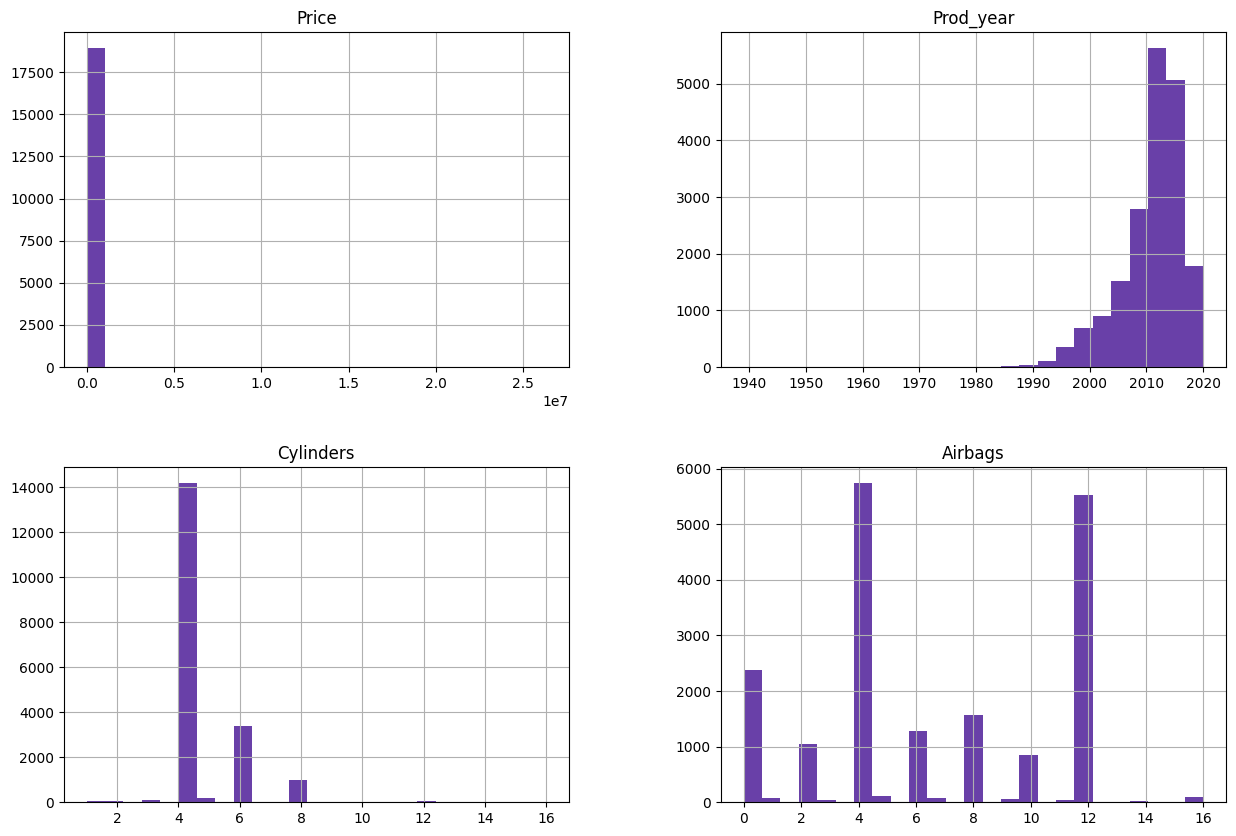

In [15]:
df.hist(bins=25,figsize=(15,10),color='#6940A8')
plt.show()

Vistazo general de las variables numéricas.

A simple vista se puede ver que algo anda mal con la distribución de la variable price. A su vez, varias variables que deberían ser numéricas no se graficaron, por lo que debe haber varias columnas con diferentes tipos de valores cuando deberían ser numéricos.



###  🧹Limpieza `'Levy'`

In [16]:
df['Levy'].value_counts()

Levy
-       5709
765      482
891      453
639      403
640      398
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: count, Length: 559, dtype: int64

In [17]:
(df['Levy'] == '-').sum()

5709

Se tomó la decisión de no borrar sino reemplazar los valores de Levy igulaes a '-'

In [18]:
# Se rellenan los valores vacíos de levy con la mediana
df['Levy'] = df['Levy'].replace('-',pd.NA)
df["Levy"]=df["Levy"].fillna(df["Levy"].median())


# Hacemos enteros los valores
df['Levy'] = pd.to_numeric(df['Levy']).astype(int)

df['Levy'].head(10)

0    1399
1    1018
2     781
3     862
4     446
5     891
6     761
7     751
8     394
9     781
Name: Levy, dtype: int64

Reemplazo de "-" por la media del resto de valores en `'Levy'` para tener solo ints en la columna.

***Limpieza `'Levy'` ✅***

###🧹 Limpieza `'Engine_volume'`

In [19]:
#Engine_Volume no debería ser objeto, eliminación de "Turbo"
df['Engine_volume'] = df['Engine_volume'].str.replace('Turbo',"")

In [20]:
# Se mantiene en float ya que se aceptan decimales en el volumen del motor.
df['Engine_volume'] = df['Engine_volume'].astype('float')
df['Engine_volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine_volume, Length: 18924, dtype: float64

***Limpieza `Engine_Volume` ✅***

###🧹 Limpieza `'Mileage'`

In [21]:
# Mileage no debería ser un objeto, eliminación de "km"
df['Mileage'] = df['Mileage'].str.replace('km',"")

In [22]:
df['Mileage'] = df['Mileage'].astype('int')

Quitamos "km" de la columna `Mileage` para que todos los valores sean numéricos y puedan tratarse correctamente.

***Limpieza `Mileage`✅***



###🧹 Limpieza `'Cylinders'`

In [23]:
df['Cylinders']

0        6.0
1        6.0
2        4.0
3        4.0
4        4.0
        ... 
19232    4.0
19233    4.0
19234    4.0
19235    4.0
19236    4.0
Name: Cylinders, Length: 18924, dtype: float64

In [24]:
df['Cylinders'] = df['Cylinders'].astype(int)

Cambiamos la columna `Cylinders` de float a int para que tengan el formato correcto.

### 🧹 Limpieza `'Doors'`

In [25]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

Como se puede ver, la columna doors tiene el formato incorrecto.

Se asumirá que '02-Mar' son de 2 a 3 puertas, '04-May' de 4 a 5 puertas y '>5' más de 5

In [26]:
def reemplazar_doors(valor):
  # Hay solo 3 valores en el dataframe: ['04-May', '02-Mar', '>5']
    if valor == '04-May':
        return '4-5'
    elif valor == '02-Mar':
        return '2-3'
    else:
        return valor # Si no aplican los condicionales anteriores, se mantiene el '>5'

In [27]:
# Aplicamos la función reemplazar_doors al dataframe original

df['Doors'] = df['Doors'].astype(str)
df['Doors'] = df['Doors'].apply(reemplazar_doors)
df['Doors']

0        4-5
1        4-5
2        4-5
3        4-5
4        4-5
        ... 
19232    2-3
19233    4-5
19234    4-5
19235    4-5
19236    4-5
Name: Doors, Length: 18924, dtype: object

In [28]:
df['Doors'].unique()

array(['4-5', '2-3', '>5'], dtype=object)

Al ser string para indicar un rango, esta variable se tratará como cualitativa.

***Limpieza `'Doors'`✅***

### 🧹 Limpieza `'Airbags'`

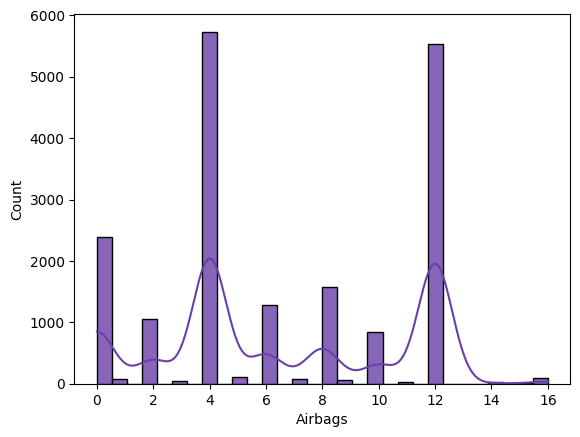

In [29]:
sns.histplot(data=df,x='Airbags', bins=30, color='#6940A8', alpha=0.8, kde=True)
plt.show()

Me llamó la atención la cantidad de autos sin airbags, pese a que el rango de años de producción en el dataframe es bastante amplio, debe verificarse para evitar valores erróneos

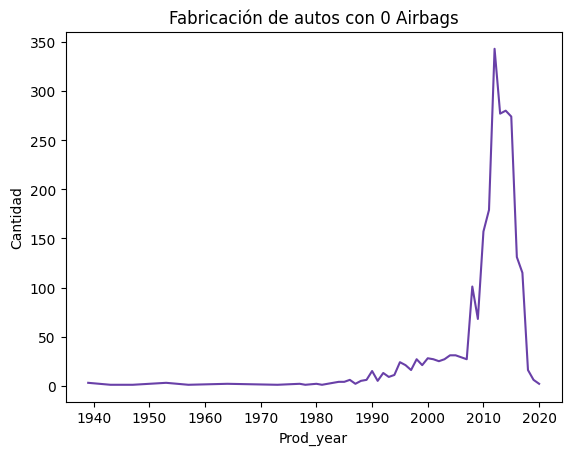

In [30]:
# Filtro el DataFrame donde Airbags == 0 y se cuenta cuanto tiene cada año
Analisis_Airbag = df[df['Airbags'] == 0].groupby('Prod_year').size()

# Graficamos
plot = sns.lineplot(data=Analisis_Airbag, color='#6940A8')
plot.set_title('Fabricación de autos con 0 Airbags')
plot.set_ylabel('Cantidad')

plt.show()

Claramente se encontró un error en los airbags, hay veces en la que indica 0 y eso no necesariamente está bien ya que los airbgas fueron reglamentarios a partir de 1998.

---

Aquellos valores que sean 0 a partir de ese año(Fecha en la que se volvieron obligatorios en USA), se reemplazarán por 2, que es el mínimo: (conductor y pasajero).

---

Probablemente queden airbags == 0, pero no serán valores erróneos sino correctos.

Ya estando en la etapa de modelado, considero de que airbag podría ser una variable que podría afectarme de menor manera al modelo, pero lo considero un "Cavo suelto" y quiero encontrar la forma en la que mejor desempaño tenga el modelo con estas tres opciones:

1. Reemplazar los Airbags por 2
2. Reemplazar los airbags por la mediana de ese año de producción
3. Dropear esos airbags == 0 >= 1998

In [31]:
# Todos los airbags == 0 que estén por delante del 1998
df[(df['Airbags'] == 0) & (df['Prod_year'] >= 1998)]['Airbags'].count()

2222

 1️⃣ Método 1

 1. Reemplazar los Airbags por 2

In [32]:
# Los que sean ceros, e inferiores a 1998, se reemplazarán por 2 que es el mínimo reglamentario
#df.loc[(df['Airbags'] == 0) & (df['Prod_year'] >= 1998), 'Airbags'] = 2

 2️⃣ Método 2

2. Reemplazar los airbags por la mediana de ese año de producción

In [33]:
mediana_airbags_xaño = df.groupby('Prod_year')['Airbags'].median()


In [34]:
for index, row in df.iterrows():
    if row['Airbags'] == 0 and row['Prod_year'] >= 1998:
        mediana_airbags = mediana_airbags_xaño[row['Prod_year']]
        df.at[index, 'Airbags'] = mediana_airbags

3️⃣ Método 3

3. Dropear esos airbags == 0 >= 1998


In [35]:
#df = df[~((df['Airbags'] == 2) & (df['Prod_year'] >= 1998))]

Se tomó la decisión de mantener la opción nro 2 ya que es la que mayor desempeño da respecto a los algoritmos

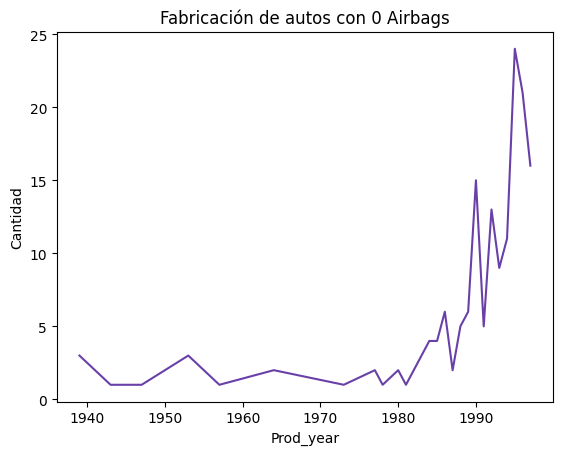

In [36]:
# Filtro el DataFrame donde Airbags == 0 y se cuenta cuanto tiene cada año
Analisis_Airbag = df[df['Airbags'] == 0].groupby('Prod_year').size()

# Graficamos
plot = sns.lineplot(data=Analisis_Airbag, color='#6940A8')
plot.set_title('Fabricación de autos con 0 Airbags')
plot.set_ylabel('Cantidad')

plt.show()

Se puede ver que aún se mantienen autos con 0 airbags pero por debajo de la fecha que indicamos.

***Limpieza `'Airbags'` ✅***

### 🕵🏽‍♂️ Búsqueda de outliers


#### ❗ Identificación outliers

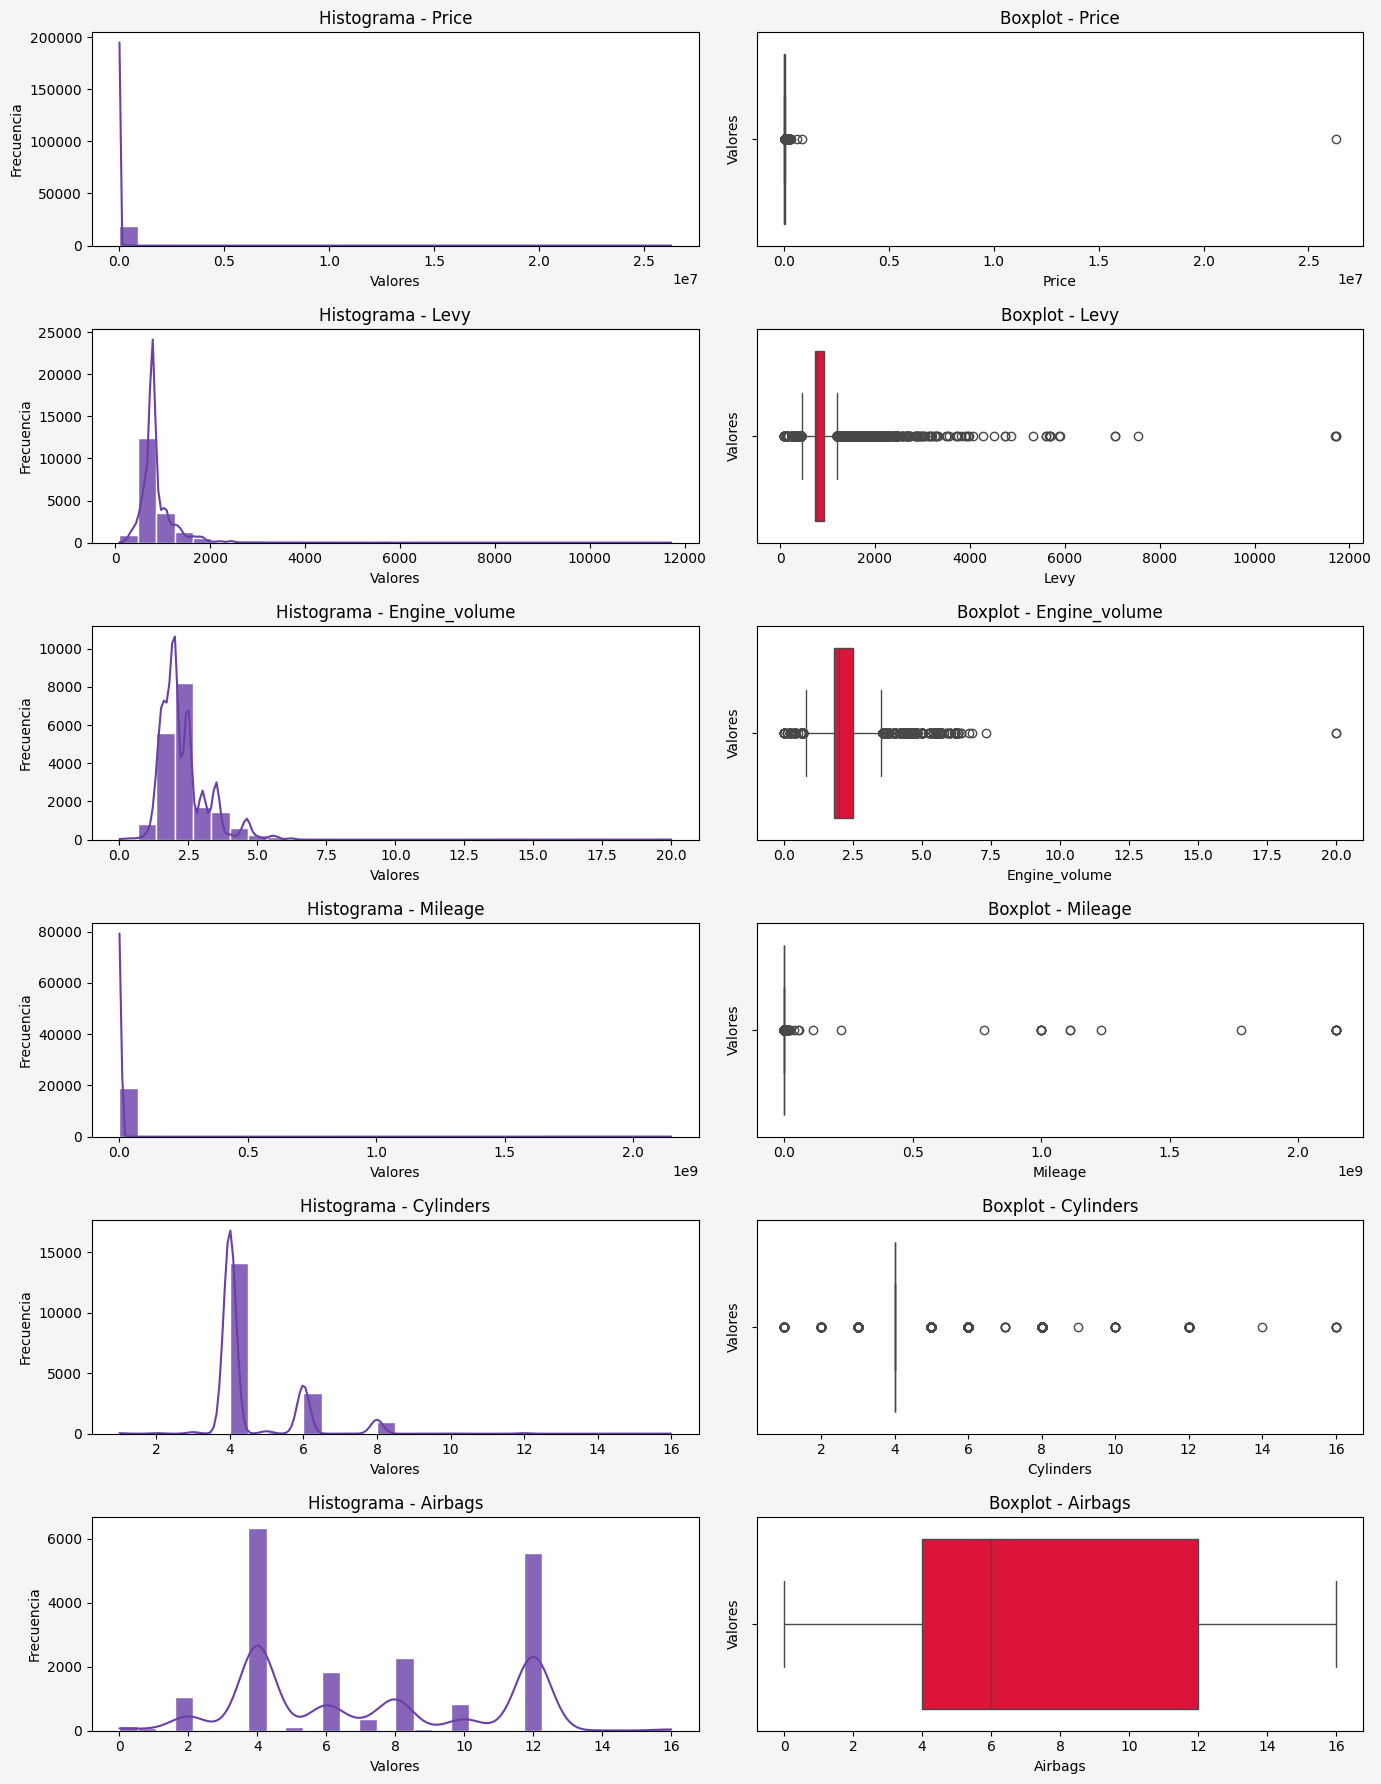

In [37]:
columnas_seleccionadas = ['Price', 'Levy','Engine_volume', 'Mileage','Cylinders', 'Airbags']

# Prepara una grilla de subplots con un gris claro
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(14, 18), facecolor='whitesmoke')
sns.set_theme(style='darkgrid')
# Itera a través de las columnas seleccionadas y hace histogramas y boxplots
for i, columna in enumerate(columnas_seleccionadas): #Enumerate permite iterar en una lista, returneando una tupla que contiene el índice de cada elemento y el elemento mismo.
    # Histograma
    sns.histplot(df[columna], bins=30, color='#6940A8', alpha=0.8, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma - {columna}')
    axes[i, 0].set_xlabel('Valores')
    axes[i, 0].set_ylabel('Frecuencia')

    # Boxplot
    sns.boxplot(x=df[columna], ax=axes[i, 1], color='crimson', boxprops=dict(facecolor='crimson'))
    axes[i, 1].set_title(f'Boxplot - {columna}')
    axes[i, 1].set_ylabel('Valores')


# Ajuste de espacio
plt.tight_layout()

# Muestra el gráfico
plt.show()

Viendo estos gráficos, se puede ver que hay muchísimos outliners

Habiendo limpiado los datos, el único que parece estar correcto es `'Airbag'`, por lo tanto, vamos a eliminar los valores atípicos en el resto de columnas

####🗑️ Eliminación Outliers

Para la identificación de los outliers, voy a utilizar un méotodo llamado IQR o en español RIQ.


---


*El rango intercuartílico (RIC) es una medida de dispersión estadística que se utiliza para evaluar la variabilidad en el rango intermedio de un conjunto de datos, excluyendo los valores atípicos o extremos. *

---
El primer cuartil (Q1) es el valor que deja atrás al 25% más bajo de los datos, el segundo cuartil (Q2) es equivalente a la mediana y el tercer cuartil (Q3) es el valor que deja atrás al 75% más bajo de los datos.

Pasospara calcular el IQR:
1.   Determinar el RIC retandole q1 a q3
2.   Definir el límite inferior y superior
  -  límite inferior: Q1-1.5*IQR
  - Límite superior: Q3+1.5*IQR
3. Identificar valores atípicos:
- Cuaqluier dato sobre o debajo de los límites marcados, es considerado un potencial dato atípico.




In [38]:
#Lista de columnas a verificar sus outliers
columnas = ['Levy', 'Engine_volume', 'Mileage','Price']


# Dicionario para contar los outliers
outliers = {}

def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definiendo el límite de los outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Encontrar y contar los outliers
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    contar_outliers = outliers.shape[0]

    # Eliminación de outliers del dataframe
    df_limpia = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]

    return df_limpia, contar_outliers

# Iteración de la función en cada columna y almacenamiento de los resultados
for columna in columnas:
    df, contar_outliers = eliminar_outliers(df, columna)
    outliers[columna] = contar_outliers

# Impresión de los resultados
print("Cantidad de Outliers:")
for columna, cant in outliers.items():
    print(f"{columna}: {cant}")

Cantidad de Outliers:
Levy: 3103
Engine_volume: 560
Mileage: 575
Price: 786


Se eligieron las columnas `'Levy', 'Engine_volume', 'Mileage','Price'` ya que basándonos en el punto anterior (identificación de outliers) se llegó a la conclusión de que esas columnas debían tener un ajuste de valores atípicos ya que afectarían gravemente al modelo.

---



### 🧹 Limpieza `'Price'`

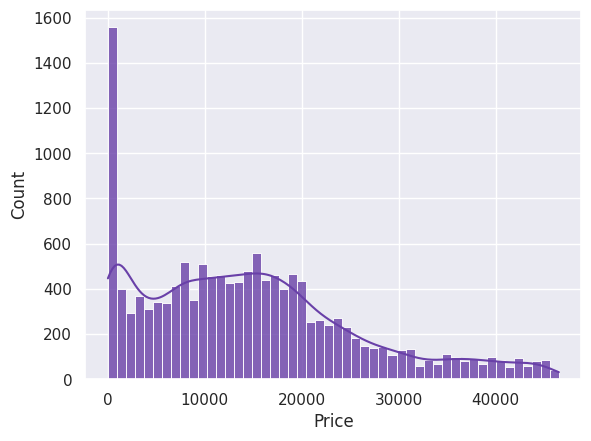

In [39]:
sns.histplot(data=df,x='Price', bins=50, color='#6940A8', alpha=0.8, kde=True)
plt.show()

Analizando el precio se pueden ver muchos valores menores a 500, que parece un número demasiado bajo para ser considerado un dato válido

Eliminamos todos los valores <= 500 ya que se consideraron como valores erróneos

In [40]:
# Dejamos en el dataframe solo los valores mayores o iguales a 500
df = df[df['Price'] >= 500]

***Limpieza `'Price'`***✅

## 🔄 Cambios después de la Limpieza

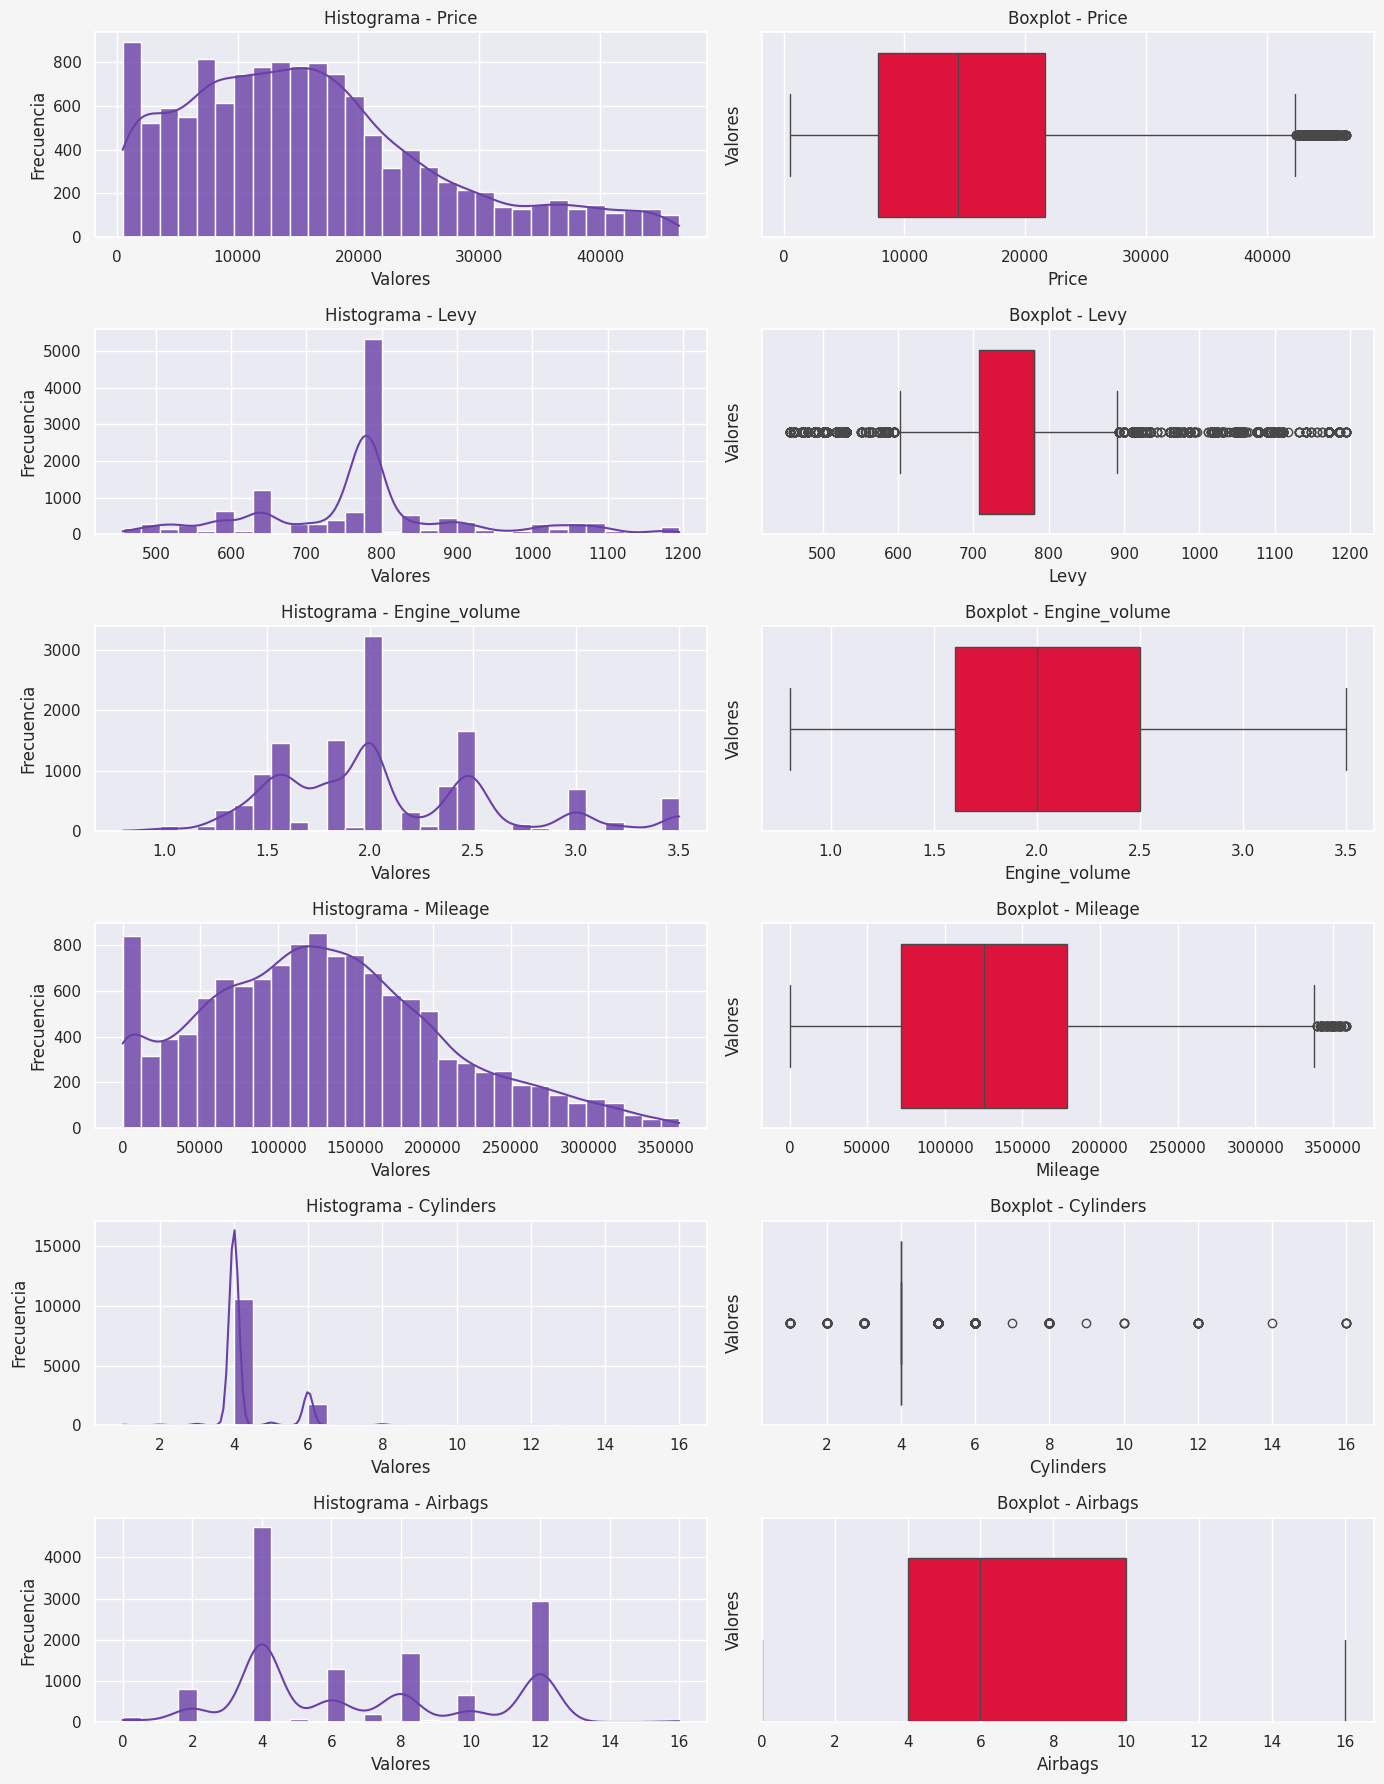

In [41]:
columnas_seleccionadas = ['Price', 'Levy','Engine_volume', 'Mileage','Cylinders', 'Airbags']

# Prepara una grilla de subplots con un gris claro
sns.set_theme(style='darkgrid')
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(14, 18), facecolor='whitesmoke')

# Itera a través de las columnas seleccionadas y hace histogramas y boxplots
for i, columna in enumerate(columnas_seleccionadas):
    # Histograma
    sns.histplot(df[columna], bins=30, color='#6940A8', alpha=0.8, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma - {columna}')
    axes[i, 0].set_xlabel('Valores')
    axes[i, 0].set_ylabel('Frecuencia')

    # Boxplot
    sns.boxplot(x=df[columna], ax=axes[i, 1], color='crimson', boxprops=dict(facecolor='crimson'))
    axes[i, 1].set_title(f'Boxplot - {columna}')
    axes[i, 1].set_ylabel('Valores')

plt.ylim(ymin=0)
plt.xlim(xmin=0)

# Ajuste de espacio
plt.tight_layout()

# Muestra el gráfico
plt.show()

Se observa claramente una gran mejoría respecto al 1er gráfico, los datos se encuentran mucho mejor distruibuídos. Tomé la decisión de mantener `'Cylinders'` con los valores comunes ya que el groso de su densidad se encuentra en '4' y es normal que respecto al resto de valores haya una gran diferencia en su cantidad.


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12770 entries, 1 to 19234
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             12770 non-null  int64  
 1   Levy              12770 non-null  int64  
 2   Manufacturer      12770 non-null  object 
 3   Model             12770 non-null  object 
 4   Prod_year         12770 non-null  int64  
 5   Category          12770 non-null  object 
 6   Leather_interior  12770 non-null  object 
 7   Fuel_type         12770 non-null  object 
 8   Engine_volume     12770 non-null  float64
 9   Mileage           12770 non-null  int64  
 10  Cylinders         12770 non-null  int64  
 11  Gear_box_type     12770 non-null  object 
 12  Drive_wheels      12770 non-null  object 
 13  Doors             12770 non-null  object 
 14  Wheel             12770 non-null  object 
 15  Color             12770 non-null  object 
 16  Airbags           12770 non-null  float64
dty

In [43]:
df.describe()

,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Airbags
count,12770.000000,12770.000000,12770.000000,12770.000000,12770.000000,12770.000000,12770.000000
mean,16012.401331,774.774315,2010.420282,2.082897,129797.053798,4.311355,6.852153
std,10660.454672,142.031418,5.650478,0.548212,77876.364635,0.851402,3.546855
min,500.000000,456.000000,1953.000000,0.800000,0.000000,1.000000,0.000000
25%,7840.000000,707.000000,2009.000000,1.600000,72000.000000,4.000000,4.000000
50%,14454.000000,781.000000,2012.000000,2.000000,125000.000000,4.000000,6.000000
75%,21639.000000,781.000000,2014.000000,2.500000,178609.750000,4.000000,10.000000
max,46534.000000,1195.000000,2020.000000,3.500000,358526.000000,16.000000,16.000000


### 📈 Insights

Ahora que tenemos todas las columas correctamente limpias, podemos concluir que:

Shape del dataframe: (12770 x 16)

0 valores nulos ✅

0 filas duplicadas ✅

---

Ahora la Feature `'Price'` está mucho mejor distribuída y se pueden conseguir datos mucho más correctos y realistas:

- Precio promedio: $16.012

- Precio mínimo: $500 (Sin considerar levy)

- Precio máximo: $46.534
---
Rango de fecha de producción:

- 1953 - 2010
---

`'Levy'` no es directamente proporcional al precio.

---

La densidad en `Cylinders` se concentra en "4"

## 🧐 Análisis de columnas cualitativas y Feature engineering

Se hace un análisis a las columnas cualitativas ya que estas no son aceptadas por el modelo. Las columnas cuantitativas ya fueron tratadas en *Limpieza*

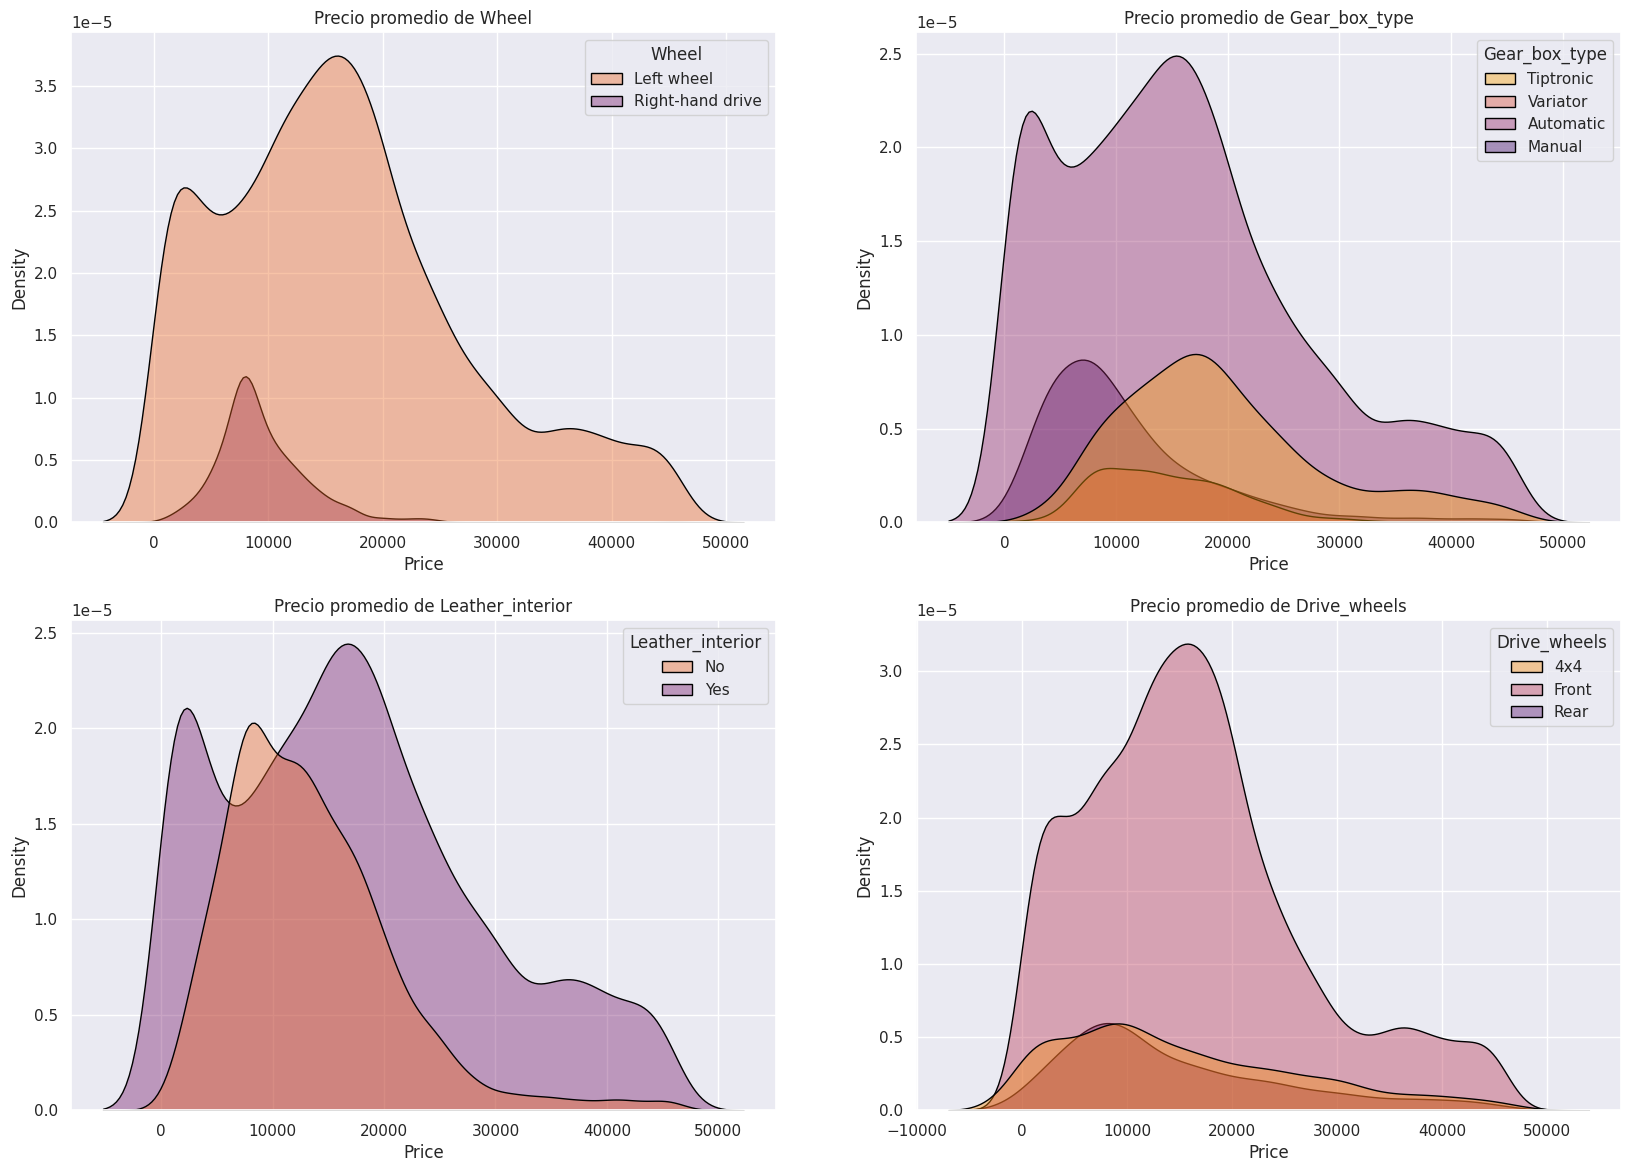

In [44]:
columnas_a_graficar_kde = ['Wheel', 'Gear_box_type', 'Leather_interior', 'Drive_wheels']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

#Hacemos nuestra propia paleta

# Flateneamos para simplificación de visualización
ejes = ax.flatten()

for i, columna in enumerate(columnas_a_graficar_kde):
    # Ordena los datos por el precio promedio en orden descendente
    datos_organizados = df.groupby(columna)['Price'].mean().sort_values(ascending=False).index

    sns.kdeplot(data=df, x='Price', hue=columna, ax=ejes[i], fill=True,palette='inferno_r',edgecolor='black',common_norm=True,alpha=0.4)
    ejes[i].set_title(f'Precio promedio de {columna}')

plt.show()

`Wheel`: "Left wheel" que sería el volante al lado izquierdo, tiene una densiad mucho mayor respecto a la otra variable "Right-hand drive". Respecto a la distribución del precio, parece que el volante del lado derecho pertenece a un nicho que su foco se encuentra entre los 8.000 a 10.000, mientras que left wheel está mucho más distribuido de 500 a 50.000

En `Gearbox_type` parece que ser que los autos automáticos predominan en toda la distribución de precios y en densidad.

`Leather_interior` no parece mostrar patrones muy claros, "Yes" y "No" se encuentran en todo el rago de precios, sin embargo, `Leather_Interior` prima ser negativo alrededor de los 8.000usd, sin embargo, muchos más vehículos Si tienen interior de cuero, los cuales se pueden encontrar en cualquier rango de precios, siendo su punto máximo los 16.000usd aprox.

Por último, se ve que `front` (Tracción delantera en español) supera ampliamente a las otras tracciones en el dataframe.

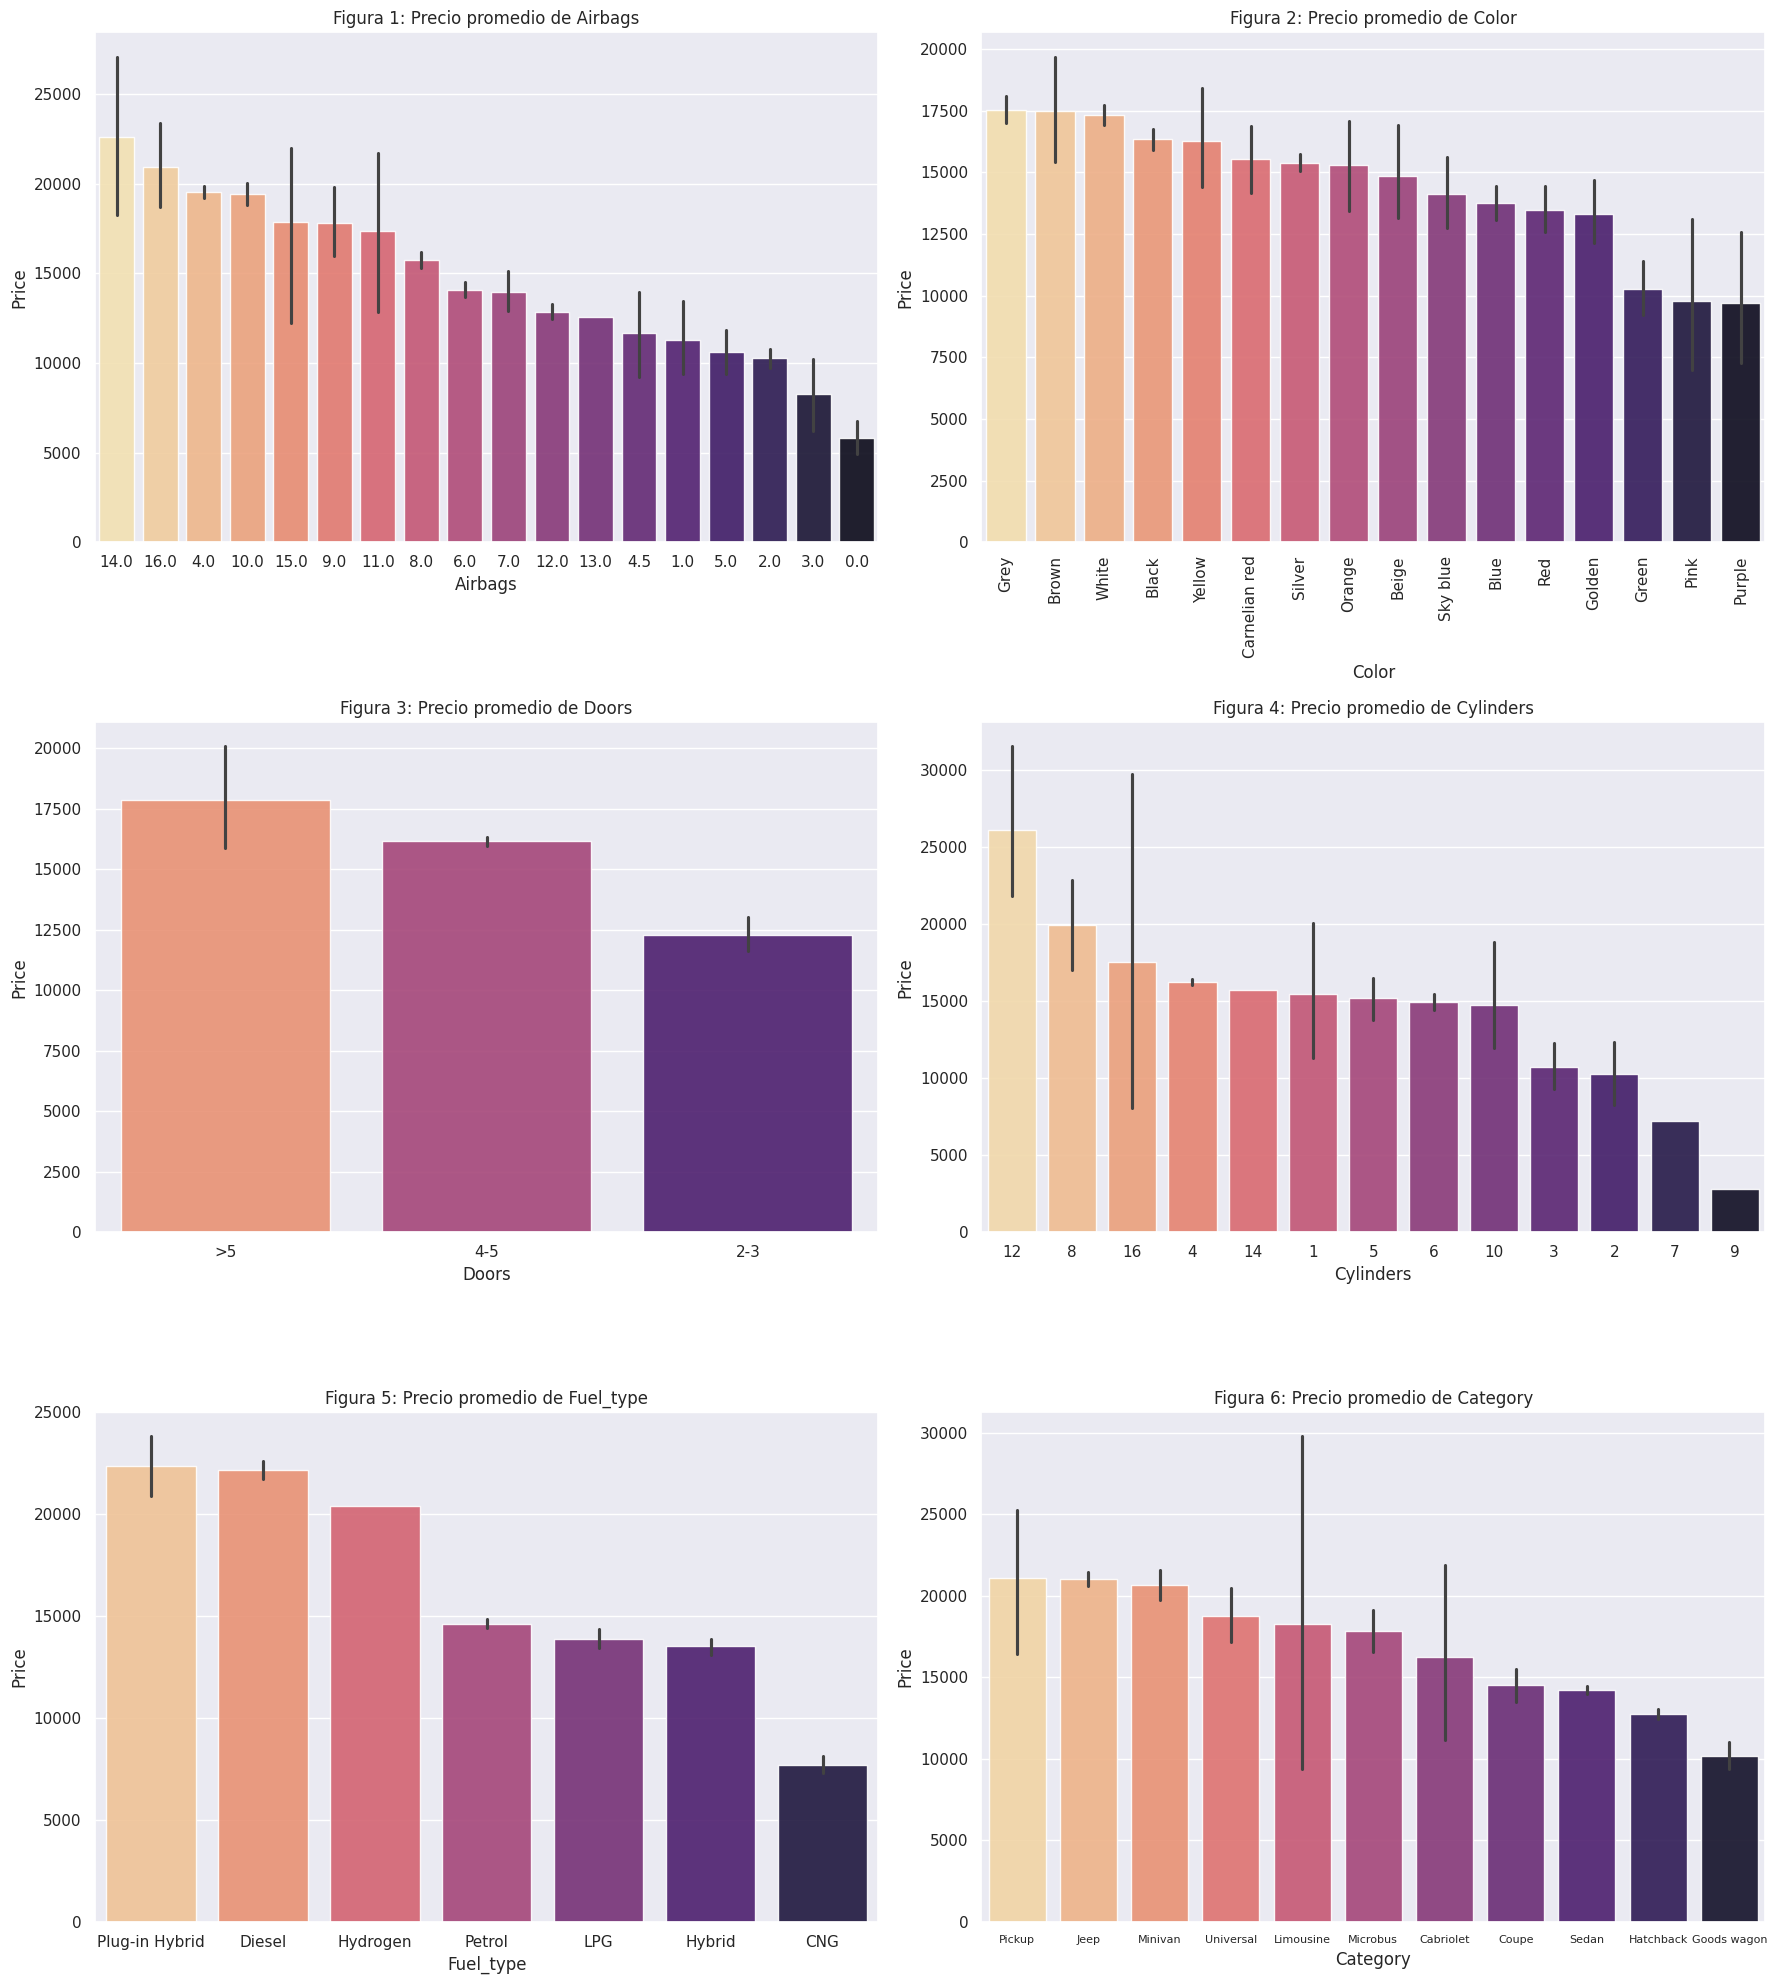

In [45]:

# Lista de columnas a graficar
columnas_a_graficar_barra = ['Airbags', 'Color', 'Doors', 'Cylinders', 'Fuel_type', 'Category']
sns.set_theme(style='darkgrid')

# Creación de grilla subplot 5x2
fig, ejes = plt.subplots(nrows=3, ncols=2, figsize=(18, 20))

# Flattenear los ejes para simplificar la visualización
ejes = ejes.flatten()

# Itera sobre las columnas y genera gráficos de barras
for i, columna in enumerate(columnas_a_graficar_barra):

    # Ordena los datos por el precio promedio en orden descendente
    datos_organizados = df.groupby(columna)['Price'].mean().sort_values(ascending=False).index

    #graficamos
    sns.barplot(x=columna, y='Price', data=df, order=datos_organizados, ax=ejes[i], palette='magma_r',alpha=0.9)

    #leyenda
    ejes[i].set_title(f'Figura {i+1}: Precio promedio de {columna}')
    if columna == 'Color':
      ejes[i].tick_params(axis='x', rotation=90)   # Cambia el tamaño de la fuente del eje x porque en algunos gráficos se solapa
    if columna == 'Category':
      ejes[i].tick_params(axis='x', labelsize= 8)



# Ajustar presentación

plt.tight_layout()
plt.show()

Figura 1: La cantidad de airbags no parece influír demasiado en el precio, 13 y 12 están bastante bajos en la lista mientras que 4 está bastante alto con muy poca dispersión

Figura 2: Colores más "clásicos" (negro blanco, gris) suelen tener más precio que colores más "raros" (violeta, verde, rosa)

Figura 3: Lógicamente, cuantas más puertas tenga el auto más caro va a ser ya que también nos indicaría el tamaño del vehículo

Figura 4: ! No necesariamente más cilindros significa más caro, por ende, este podría ser un factor secundario a la hora de predecir el precio.

Figura 5: Se ve una diferencia clara entre los 3 primeros y sus 3 siguientes.

Figura 6: Se ven variables que tienen mucha dispersión en sus precios. Las limusinas y el cabriolet pueden variar en un rango amplio su precio. Hay que tenerlo en mente para ver que no afecte negativamente al modelo. En el caso de la limusinas, puede ser un valor atípico pero real ya que las limusinas son autos de lujo.


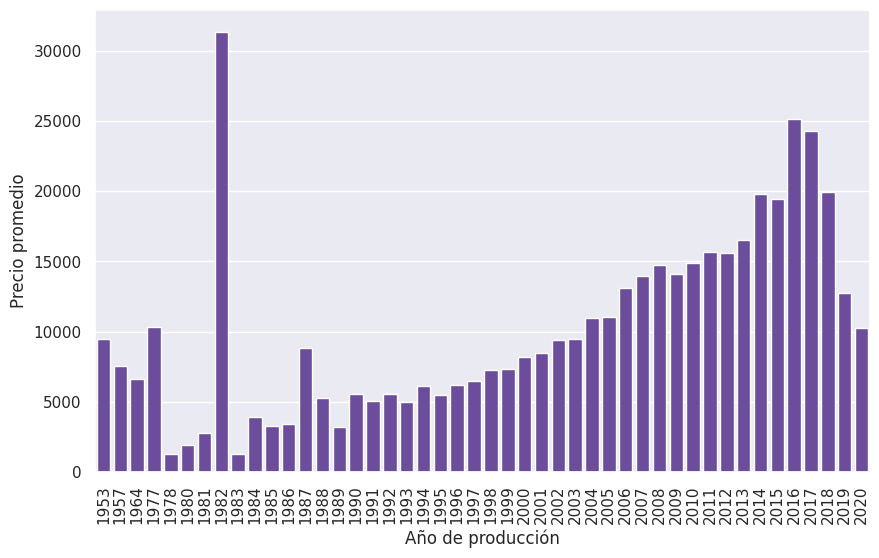

In [46]:
#Hacemos una tabla con el promedio del precio de cada año
promedio_preciosxaño = df.groupby('Prod_year')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))

#Graficamos
sns.barplot(data=promedio_preciosxaño, x='Prod_year', y='Price', color='#6940A8')

#Etiquetas
plt.xlabel('Año de producción')
plt.ylabel('Precio promedio')

#Rotamos las etiquetas del x así no se solapan entre sí
plt.xticks(rotation=90)


plt.show()

Del 1978 al 1982 hubo una crisis económica en el sector automotriz por la combinación de factores económicos, regulatorios y de mercado, de ahí esa baja en la producción. Y respecto a la suba de ventas (+30.000) en 1982, fue cuando se pudo salir de esta crisis y se vendió todo el inventario acumulado durante la recesión. Durante los años de crisis, los fabricantes de automóviles redujeron la producción para ajustarse a la baja demanda, lo que resultó en un exceso de inventario en los concesionarios y en las instalaciones de fabricación. Para liquidar este exceso de inventario y recuperar la rentabilidad, los fabricantes de automóviles aumentaron la producción en 1982, ofreciendo descuentos y promociones para despejar el inventario acumulado. Esto llevó a un aumento significativo en la producción y precio de los automóviles de ese año.


In [47]:
promedio_preciosxmarca = df.groupby('Manufacturer')['Price'].mean().reset_index()
promedio_preciosxmarca = promedio_preciosxmarca.sort_values(by='Price', ascending=False)

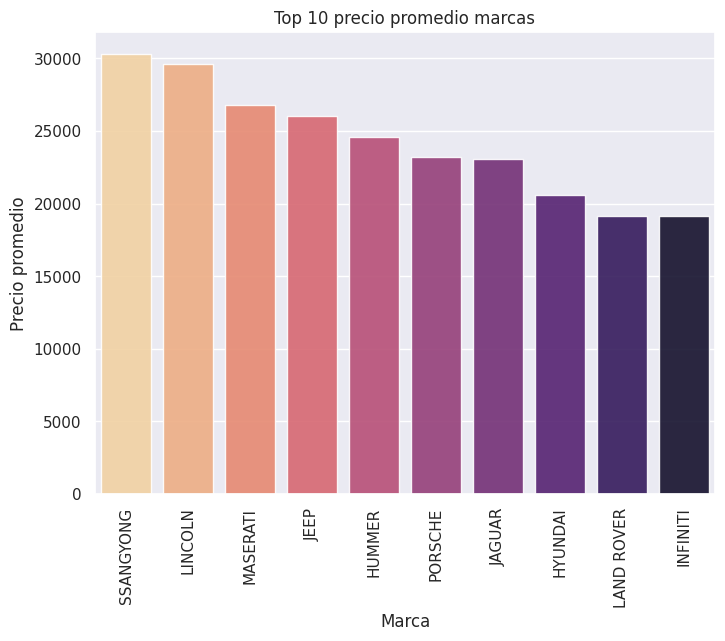

In [48]:
plt.figure(figsize=(8, 6))

#Uso de head para mostrar las 10 mejores marcas
sns.barplot(x='Manufacturer', y='Price', data=promedio_preciosxmarca.head(10), palette='magma_r',alpha=0.9)
plt.title('Top 10 precio promedio marcas')
plt.xlabel('Marca')
plt.ylabel('Precio promedio')
plt.xticks(rotation=90)

plt.show()

Marcas más caras identificadas

In [49]:
# Dataframe hecho para poder graficar las 5 categorías más vendidas/usadas
contar_categorias = df['Category'].value_counts().reset_index()
contar_categorias.columns = ['Categoria', 'Cantidad']


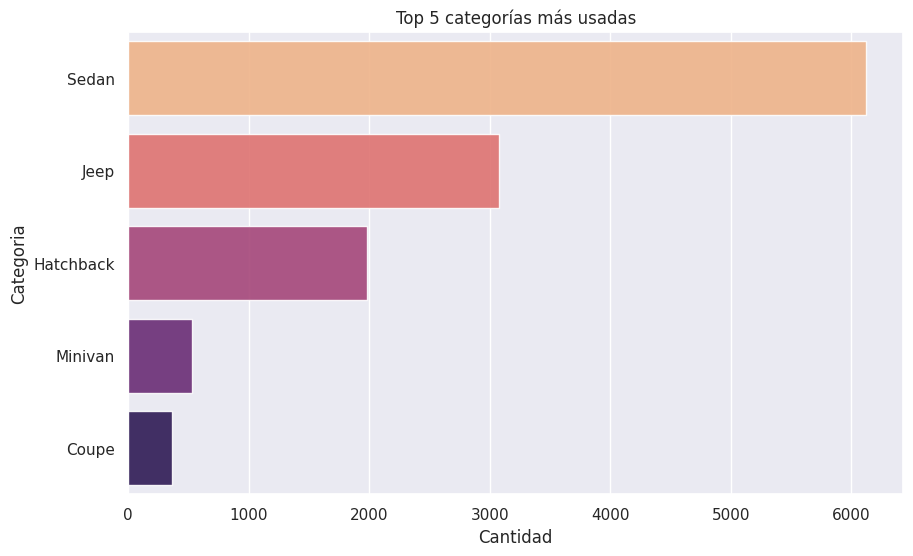

In [50]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Cantidad', y='Categoria', data=contar_categorias.head(5),palette='magma_r',alpha=0.9)
plt.xlabel('Cantidad')
plt.ylabel('Categoria')
plt.title('Top 5 categorías más usadas')

plt.show()

Nuestro dataset al tener unos 12.000 registros, que una de las categorías más usadas tenga 6.000 registros es un número bastante elevado. Esta podría ser una feature importante a futuro ya que el groso de los datos se encuentra distribuído en pocas categorías.


In [51]:
# Feature engineering para la columna 'Prod_year', para el modelo será más fácil tratar la "antiguedad" del auto más que su año de producción
df['Prod_year'] = 2024 - df['Prod_year']
df.rename(columns={'Prod_year':'Antiquity'}, inplace = True)
df['Antiquity']
df['Antiquity'].unique()

array([13, 18,  8, 14, 11, 17, 10, 27,  6, 12, 23, 29, 16,  9, 20,  5, 26,
       34, 15, 19, 25,  7, 21, 28, 22, 24, 32, 36, 47, 35, 30, 31, 40, 38,
       33, 41, 60,  4, 37, 39, 67, 44, 46, 42, 43, 71])

Esto se hace para simplificar los datos para el modelo, ya que podría proporcionar más información su antiguedad más que la fecha exacta en la que fue fabricado.

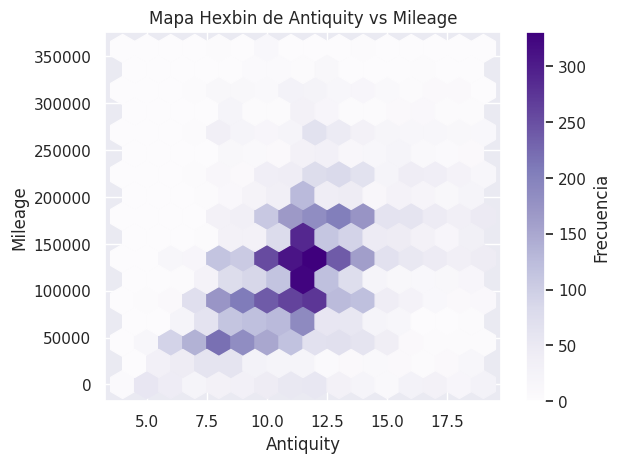

In [52]:
# Segmentamos la info para que se pueda visualizar bien el gráfico
menos_antiguos = df[df['Antiquity'] < 20]


plt.hexbin(x=menos_antiguos['Antiquity'],y=menos_antiguos['Mileage'],gridsize=15,cmap='Purples')
plt.colorbar(label='Frecuencia')
plt.xlabel('Antiquity')
plt.ylabel('Mileage')
plt.title('Mapa Hexbin de Antiquity vs Mileage')

plt.show()

Utilizamos la nueva variable que creamos, y se puede ver que efectivamente la feature `Antiquity` podría estar fuertemente relacionada con la cantidad de millas del auto.

🔗 Matriz de correlación

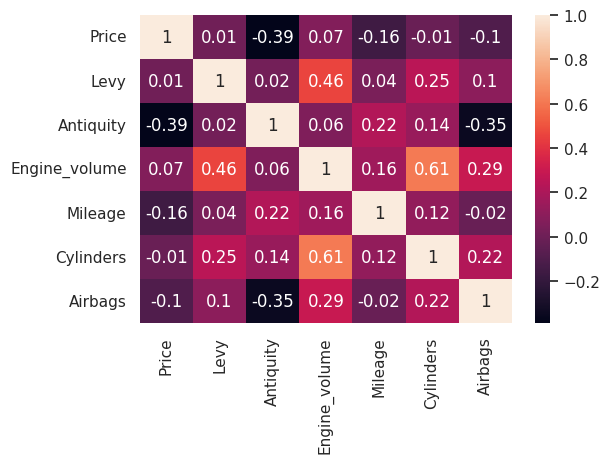

In [53]:
columnas_numericas = df.select_dtypes(include=['int64', 'float64'])
matriz_corr = columnas_numericas.corr().round(2)

plt.figure(figsize=(6,4))

sns.heatmap(matriz_corr, annot=True)
plt.show()

Confirmamos la correlación de la feature recientemente creada y se pueden ver otras relaciones más fuertes que se detallarán en la siguiente conclusión:

#### 📊 Conculsiones



- La variable `Price` tiene correlación negativa con `Antiquity` (-0.40) y una menor correlación positiva con `Engine_volume` (0.07).
  Esto significa que vehículos más antiguos tienden a tener precios más bajos 📉, mientras que los vehículos con motores más grandes tienden a tener precios más altos📈.

- `Engine_volume` tiene cierta correlación con `Mileage` (0.15) y una correlación alta con `Cylinders` (0.59). Esto indica que los vehículos con motores más grandes tienden a tener una mayor cilindrada y a su vez, más capacidad y mejor rendimiento para recorrer distancias más grandes.

- Por otro lado, `Antiquity` tiene una correlación bastante negativa con el precio (-0.40) y los airbags (-0,31), lo que indica que la antigüedad del vehículo puede tener un impacto importante en su precio y cantidad de airbags.

- La correlación entre `Mileage` y `Antiquity` es de  (0.22). Es común que los vehículos más antiguos tengan un kilometraje más alto, ya que han estado en uso durante más tiempo.

- La variable `Levy` pese a ser un valor agregado al precio base del vehículo, tiene una correlación muy baja con `Price` (0.02), y pareciera tener más relación con el `Engine_volume`del auto (0.46)

---

Dicho, esto, se pudieron identificar posibles redundancias en los datos y tenemos una mejor comprención respecto a las relaciones lineales entre las variables.

Por ejemplo, se puede destacar la alta correlación entre `Engine_Volume` y `Cylinders`, lo cual nos sugiere que estas características nos podrían estar proporcionando información similar

O por otro lado, también se podría destacar la relación entre `Mileage` y `Antiquity` para evaluar el valor residual de un vehículo usado.

Como simplificar el modelo no es una prioridad y no se identificaron valores altamente correlacionales (+0.8), se tomó la decisión de no eliminar ninguna variable

## 🥈 1er Intento Encoding & Modelado

Habiendo Explorado, analizado, limpiado y preprocesando los datos, podemos comenzar con el último paso antes de modelar: Encoding

### 🔮 Transformación de los datos 1 |  Label Encoder



El método de encoding LabelEncoding es una manera sencilla de convertir datos categóricos en números para que puedan ser utilizados por algoritmos de aprendizaje automático.


Imagina que tienes una lista de colores como "rojo", "verde" y "azul", pero los algoritmos de aprendizaje automático trabajan con números. Entonces, en lugar de tener "rojo", "verde" y "azul", les asignamos números como 0, 1 y 2, respectivamente.


Así, el ***LabelEncoding*** simplemente asigna un número a cada categoría única en tus datos. Por ejemplo, si tienes una columna de "Colores" con las opciones "rojo", "verde" y "azul", después de aplicar LabelEncoding, podrías tener 0 para "rojo", 1 para "verde" y 2 para "azul".


Esto ayuda a los algoritmos de aprendizaje automático a entender y trabajar con estos datos categóricos de una manera más fácil, ya que ***ahora están en un formato numérico*** que pueden procesar más eficientemente.



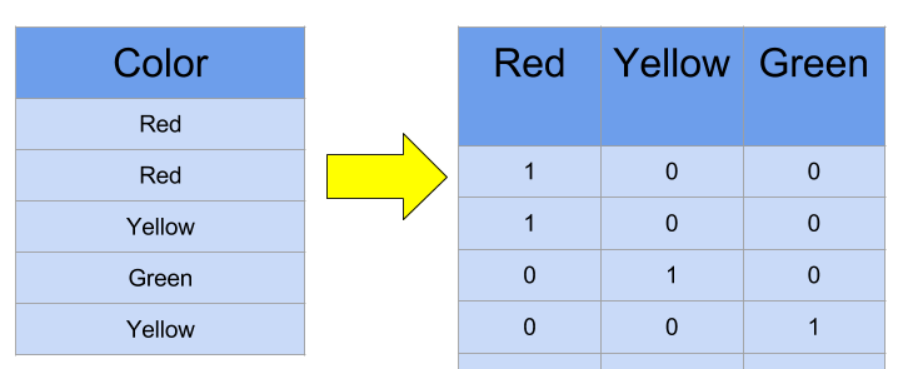

In [54]:
#Separamos las categorías cualitativas de las cuantitativas
categoricos = df.select_dtypes(include=object)
numericos = df.select_dtypes(exclude=object)

Esto se hace para tener a todas las variables a tratar en un mismo dataframe, así el encoding se aplca únicamente a las variables que no sean numéricas

In [55]:
#Reemplazamos todas las variables categoricas por valores numéricos enteros
#Aplicamos laber encoder a cada columna categórica
for i in range(0, categoricos.shape[1]):
  categoricos[categoricos.columns[i]] = lab.fit_transform(categoricos.iloc[:, i])

In [56]:
#Concatenamos las filas para tener nuestro df completamente numérico
dfLE = pd.concat([numericos,categoricos],axis=1)
#dfLE de "Label Encoder"
dfLE

,Price,Levy,Antiquity,Engine_volume,Mileage,Cylinders,Airbags,Manufacturer,Model,Category,Leather_interior,Fuel_type,Gear_box_type,Drive_wheels,Doors,Wheel,Color
1,16621,1018,13,3.0,192000,6,8.0,6,529,4,0,5,2,0,1,0,1
2,8467,781,18,1.3,200000,4,2.0,18,548,3,0,5,3,1,1,1,1
3,3607,862,13,2.5,168966,4,6.0,13,531,4,1,2,0,0,1,0,14
5,39493,891,8,2.0,160931,4,4.0,20,988,4,1,1,0,1,1,0,14
6,1803,761,14,1.8,258909,4,12.0,52,893,3,1,2,0,1,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19227,29793,1053,10,3.5,219030,6,12.0,32,486,9,1,1,0,0,1,0,1
19231,5802,1055,11,3.5,107800,6,12.0,32,486,9,1,1,0,2,1,0,7
19232,8467,781,25,2.0,300000,4,5.0,32,308,1,1,0,1,2,0,0,12
19233,15681,831,13,2.4,161600,4,8.0,20,1012,9,1,5,2,1,1,0,11


El encoding se aplicó correctamente y todas las features tienen valores numéricos, condición obligatoria para poder aplicar el modelo.


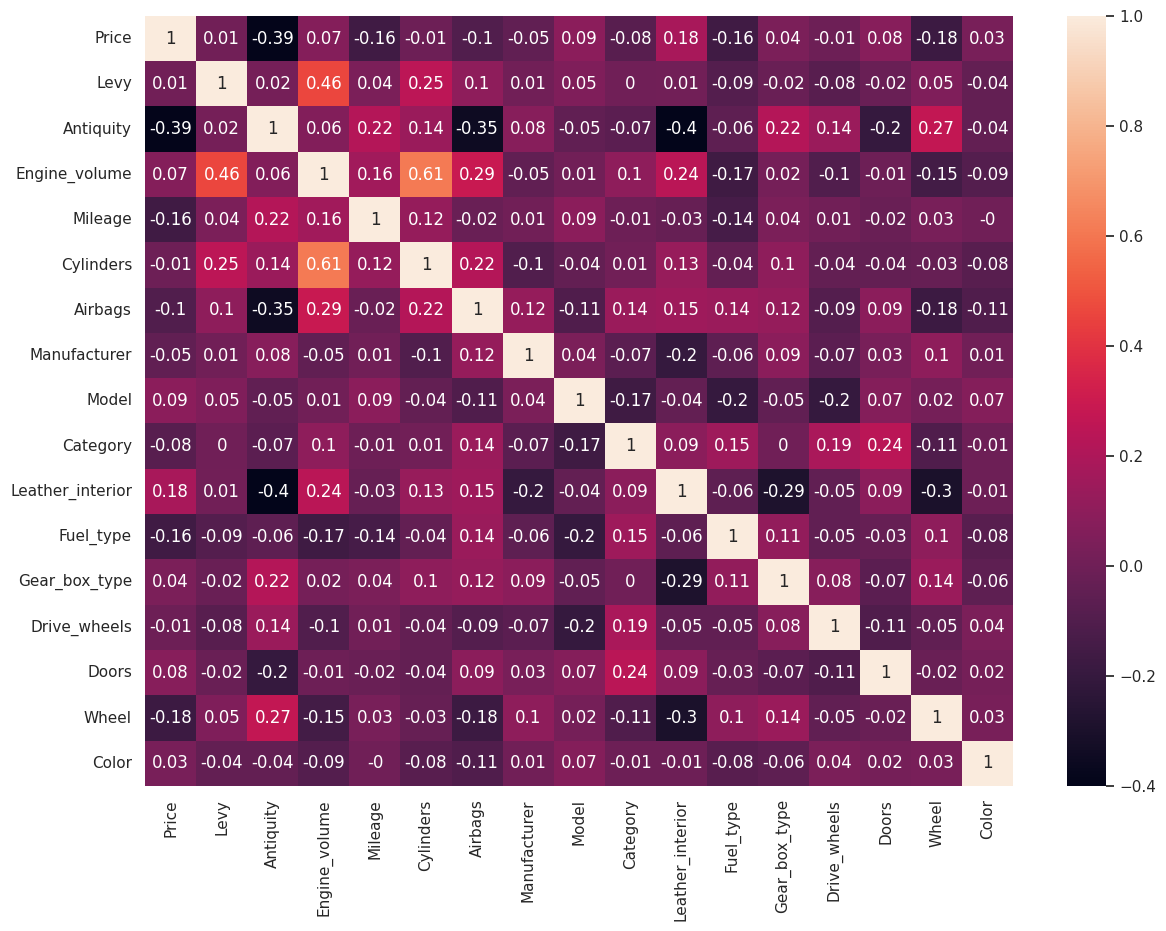

In [57]:
# Separamos las columnas numéricas del resto
columnas_numericas = dfLE.select_dtypes(exclude=['object', 'category'])

#Hacemos matriz de corr solo con columnas numéricas
matriz_corr = columnas_numericas.corr().round(2)

plt.figure(figsize=(14, 10))

sns.heatmap(matriz_corr, annot=True)
plt.show()

Se puede ver que hay muchas variables con correlaciones lógicas, como `Cylinders` con `Engine_Volume`, sin embargo, pocas de estas variables demuestran una correlación clara con la variable objetivo `Price`

### 🌈 Modelado 1


In [58]:
#Guardamos la feature objetivo a predecir
y=dfLE["Price"]

#Dropeamos la columna price del dataframe principal
X=dfLE.drop(columns=["Price"])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


---

####👀 Busqueda mejor modelo a aplicar

In [59]:
#Diccionario para almacenar los resultados del entrenamiento
resultados = {'Algoritmo': [], 'R2': [], 'RMSE': []}

In [60]:
# Función para ejectuar los modelos
# Esta funció ejecutará las predicciones y devolverá la puntuación de R2 y el RMSE

def modelado(modelo, X_train, X_test, y_train, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return r2, rmse


In [61]:
#Indicamos nombre y la función de ese modelo en un diccionario
modelos = {
    'LinearR': LinearRegression(),
    'DecisionTreeR': DecisionTreeRegressor(),
    'RandomForestR': RandomForestRegressor(n_estimators=100),
    'GradientBoostingR': GradientBoostingRegressor(),
    'XGBR': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=27),
    'LGBMR': lgb.LGBMRegressor(random_state=42)
}


Creamos un diccionario con todos los modelos a testear rendimiento para un print organizado

In [62]:
for nombre, modelos in modelos.items():
    #Utilizamos la misma función declarada en el modelado nro 1
    r2, RMSE = modelado(modelos, X_train, X_test, y_train, y_test)
    # Apendeamos el nombre del modelo
    resultados['Algoritmo'].append(nombre)
    # Apendeamos el valor de R2 del modelo
    resultados['R2'].append(r2)
    # Apendeamos el valor de RMSE del modelo
    resultados['RMSE'].append(RMSE)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 10216, number of used features: 16
[LightGBM] [Info] Start training from score 16008.727193


In [63]:
resultados_modelos = pd.DataFrame(resultados)
#Imrpimimos los resultados
resultados_modelos

,Algoritmo,R2,RMSE
0,LinearR,0.329432,8829.252971
1,DecisionTreeR,0.594808,6863.303589
2,RandomForestR,0.804359,4769.053174
3,GradientBoostingR,0.629014,6567.220270
4,XGBR,0.791385,4924.652061
5,LGBMR,0.778298,5076.773175


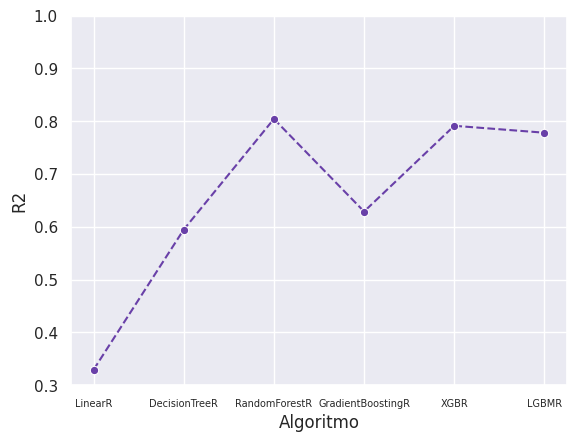

In [64]:
sns.lineplot(data=resultados_modelos,x='Algoritmo',y='R2',color='#6940A8', marker="o",linestyle='--')
plt.xticks(fontsize=7)
plt.ylim(0.3,1)

plt.show()

Se puede ver que en líneas generales ningún modelo tuvo una gran precisión, por lo que habría que tratar de buscar otra manera de tratar los datos.

Por otro lado, un dato importante es que Random Forest Regressor fue el modelo que mayor R2 tuvo, por lo tanto, podría ser un potencial candidato a modelo estrella en un modelado posterior.

#### ⚠️ Identificación Overfitting

In [65]:
kf = KFold(n_splits=5)

clf = RandomForestRegressor()

clf.fit(X_train, y_train)

score = clf.score(X_train, y_train)
print("R^2 del modelo en el conjunto de train:", score)

scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="r2")
print("R^2 en la validación cruzada:", scores)
print("Media de R^2 en validación cruzada:", scores.mean())

predicts = clf.predict(X_test)

mse = metrics.mean_squared_error(y_test, predicts)
print("Mean Squared Error en el conjunto de prueba:", mse)

r2_test = clf.score(X_test, y_test)
print("R^2 en el conjunto de test:", r2_test)

R^2 del modelo en el conjunto de train: 0.9694408290682718
R^2 en la validación cruzada: [0.78579265 0.79296088 0.75560196 0.79228288 0.77950606]
Media de R^2 en validación cruzada: 0.7812288846491218
Mean Squared Error en el conjunto de prueba: 22898078.289906587
R^2 en el conjunto de test: 0.8030329232423725


Probablemente el modelo tenga un mal rendimiento, se estima que un underfitting, ya que hay una gran diferencia entre el score del train (97% aprox) y el score del test (80% aprox)

In [66]:
X_train

,Levy,Antiquity,Engine_volume,Mileage,Cylinders,Airbags,Manufacturer,Model,Category,Leather_interior,Fuel_type,Gear_box_type,Drive_wheels,Doors,Wheel,Color
12368,781,16,3.0,32000,6,12.0,32,478,9,0,1,2,2,2,0,12
8012,1104,9,3.0,264014,6,4.0,2,926,4,1,5,0,0,1,0,1
6416,781,24,2.0,0,4,2.0,13,1081,6,0,1,1,1,0,0,14
11921,781,20,2.4,185641,4,4.0,13,1091,6,0,1,1,2,0,0,14
13359,790,15,1.6,110000,4,4.0,6,430,9,1,5,0,1,1,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16492,781,12,1.3,95000,4,8.0,18,548,3,0,2,0,1,1,1,1
1360,781,19,1.9,122000,4,4.0,32,170,9,1,5,2,1,1,0,6
7828,781,13,2.0,151000,4,8.0,55,638,3,0,1,2,1,1,0,1
18351,781,10,1.8,96000,4,6.0,28,329,3,1,2,0,1,1,0,7


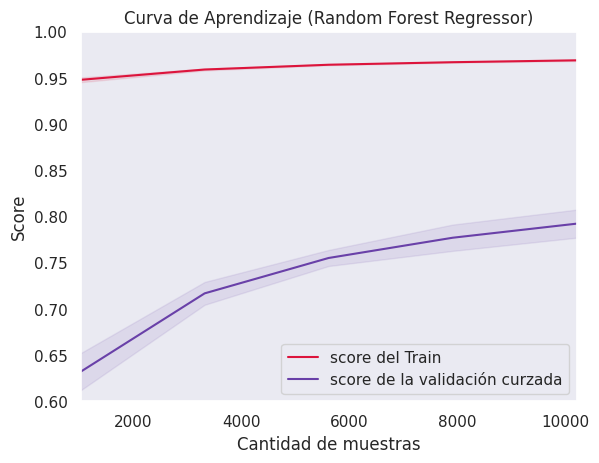

In [67]:
# Función para trazar la curva de aprendizaje
def graficar_curva_aprendizaje(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Cantidad de muestras")
    plt.ylabel("Score")

    # Calcula la curva de aprendizaje utilizando learning_curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="r2")

    # Calcula la media y la desviación estándar de los puntajes de entrenamiento y prueba
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Dibuja las curvas de aprendizaje
    plt.grid()

    #
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="crimson")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#6940A8")
    #Lineas
    plt.plot(train_sizes, train_scores_mean, color="crimson",
             label="score del Train")
    plt.plot(train_sizes, test_scores_mean, color="#6940A8",
             label="score de la validación curzada")

    plt.legend(loc="best")
    return plt

# Definir tu conjunto de características (X) y tu variable objetivo (y)

# Crear un modelo de regresión (puedes cambiar esto si deseas probar otro modelo)
estimator = RandomForestRegressor()  # Cambia este estimador si deseas probar otros modelos

# Definir los parámetros de la curva de aprendizaje
title = "Curva de Aprendizaje (Random Forest Regressor)"  # Título del gráfico
cv = KFold(n_splits=5)  # Definir la validación cruzada
n_jobs = -1  # Usar todos los núcleos de CPU disponibles

# Trazar la curva de aprendizaje
graficar_curva_aprendizaje(estimator, title, X, y, cv=cv, n_jobs=n_jobs)

plt.ylim(0.6,1)
plt.margins( x=0, y=0, tight=True)

plt.show()

Lamentablemente, la diferencia entre el score del train y el test es mucha, por lo que podría significar que este no es el método más efectivo para encodear los datos. Habrá que testear con otras formas de encoding.

Tomé la decisión de graficar igualmente ya que aunque tenga un mal rendimiento, se podrán ver las diferencias con algún otro modelo que pueda funcionar mejor.


#### 〽️ Modelado predicción

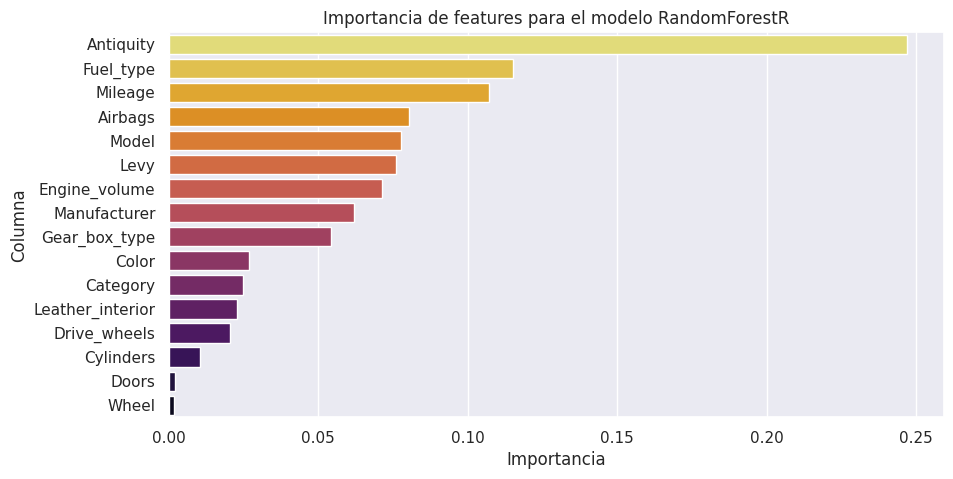

In [68]:
#FUnción similar a la anterior, pero que nos devuelve el modelo en sí
def modelo_entrenado(modelo, X_train, X_test, y_train, y_test):
    modelo_entrenado = modelo.fit(X_train, y_train)
    y_pred = modelo_entrenado.predict(X_test)
    return modelo_entrenado, y_pred

# Aplicamos la función con RandomForestRegressor, modelo que mayor puntuación tuvo
modelo_final, y_pred = modelo_entrenado(RandomForestRegressor(n_estimators=100), X_train, X_test, y_train, y_test)

importancia_columnas = modelo_final.feature_importances_
nombre_columnas = X_train.columns

# Crear un DataFrame con los nombres de características y sus importancias
importancia_columnas_df = pd.DataFrame({'Columna': nombre_columnas, 'Importancia': importancia_columnas})

# Ordenar el DataFrame por importancia en orden descendente
importancia_columnas_df = importancia_columnas_df.sort_values(by='Importancia', ascending=False)

nombre_mejor_modelo = resultados_modelos.loc[resultados_modelos['R2'].idxmax(), 'Algoritmo']

# Seleccionar las 20 características más importantes
top_columnas = importancia_columnas_df.head(16)

# Graficar la importancia de las características para las 20 más importantes
plt.figure(figsize=(10, 5))
sns.barplot(x='Importancia', y='Columna', data=top_columnas, palette='inferno_r')
plt.title(f'Importancia de features para el modelo {nombre_mejor_modelo}')
plt.xlabel('Importancia')
plt.ylabel('Columna')
plt.show()


Se puede ver que usa una gran parte de las variables para predecir el precio. Pese a eso, podría caber la posibilidad de que se consigan mejores resultados con otros métodos de encoding por lo visto en el gráfico anterior a este.


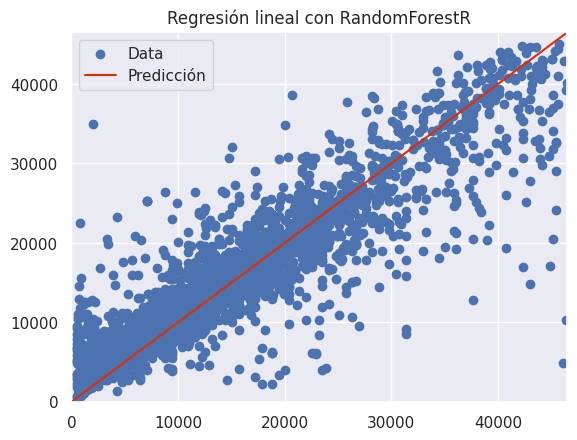

In [69]:
plt.scatter(y_test, y_pred, color='b', label='Data')


#Guardamos el valoor más alto entre las predicciones y los datos reales
max_value = max(np.max(y_test), np.max(y_pred))

nombre_mejor_modelo = resultados_modelos.loc[resultados_modelos['R2'].idxmax(), 'Algoritmo']

#Plotamos la línea de predicción desde 0 hasta el valor máximo
plt.plot([0, max_value], [0, max_value], color='#de2e03', label='Predicción')


#Estética
plt.title(f'Regresión lineal con {nombre_mejor_modelo}')
plt.margins( x=0, y=0, tight=True)

plt.legend()

plt.show()

La dispersión de los datos respecto a la predicción es muy grande, por lo que nos indica que esta forma no podría ser la adecuada para predecir los datos

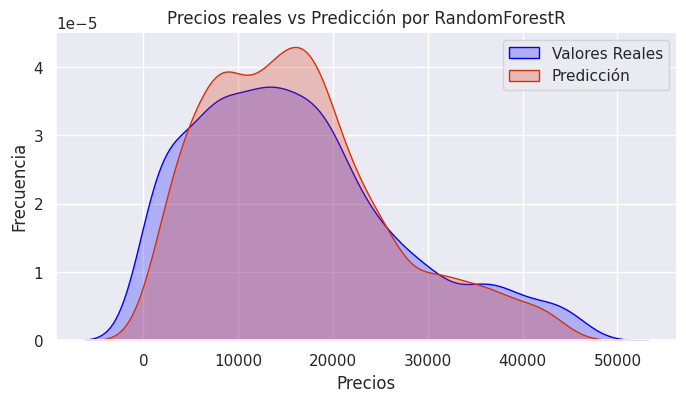

In [70]:

# Creamos un DataFrame para la comparación entre la predicción con los datos reales
comparativa = pd.DataFrame({'Real': y_test, 'Prediccion': y_pred})

# Graficamos para mostrar la diferencia entre los precios reales y la predicción
plt.figure(figsize=(8, 4))
# Graficamos los valores reales del dataframe
sns.kdeplot(data=comparativa, x='Real', label='Valores Reales', fill=True, common_norm=False, color='blue')
# Graficamos la predicción hecha por el modelo con mayor R2
sns.kdeplot(data=comparativa, x='Prediccion', label=('Predicción'), fill=True,common_norm=False, color='#de2e03')

# Estética
plt.title(f'Precios reales vs Predicción por {nombre_mejor_modelo}')
plt.xlabel('Precios')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Solo una ayuda visual para comprender y observar de mejor manera la diferencia entre los valores reales y la predicción hecha por el modelo.

###🏁 Conclusión
Pese a tener una predicción bastante correcta (r^2 = 0.8 aprox), podría buscarse un mejor método para tener una predicción más acertada.

A continuación, se realizará una prueba con los mismos modelos y gráficos, pero cambiará el método de encoding.

## 🥇 2do Intento Encoding & Modelado

### 🔮 Transformación de los datos 2 | LeaveOneOut


El método LeaveOneOut funciona calculando una estadística resumen (como la media, mediana, moda, etc.) de la variable objetivo para cada categoría en los datos.


Por ejemplo, si tienes una variable categórica "Color" con categorías como "Rojo", "Verde" y "Azul", y una variable objetivo "Precio", el ***LeaveOneOut*** calcula la media de los precios para cada categoría de color, excluyendo el valor del dato actual que está siendo codificada. Esto ayuda a evitar el sesgo que podría surgir si se incluyera el dato actual en el cálculo.


Entonces, si estamos codificando el dato de ahora con el color "Rojo", calcularíamos la media de los precios para todos los datos con el color "Rojo", pero sin incluir el precio del dato actual. Este valor calculado se asignaría como la codificación para la categoría "Rojo" en ese dato.


En resumen, el LeaveOneOut encoding es una técnica útil para codificar variables categóricas al calcular estadísticas resumen de la variable objetivo para cada categoría, excluyendo el dato actual que se está codificando, lo que puede mejorar la capacidad predictiva de los modelos de aprendizaje automático.

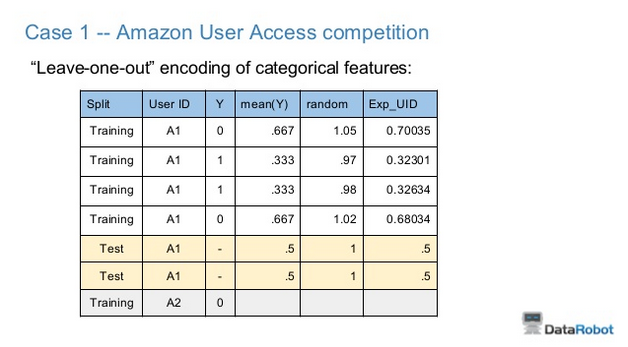

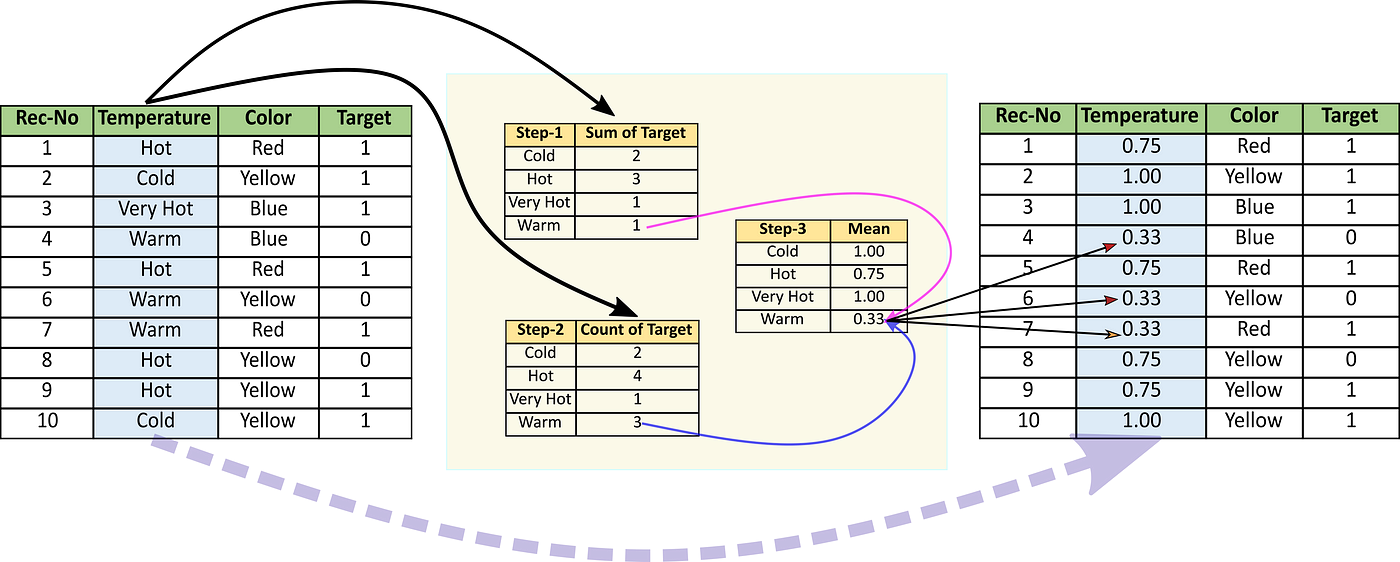

In [71]:
# Seleccionamos las columnas a codificar
columnas = ['Manufacturer', 'Model', 'Category']

# le asignamos una variable a LeaveOneOutEncoder
encoder = LeaveOneOutEncoder(cols=columnas)

# Ajustamos y transformamos todo el DataFrame
LOO = encoder.fit_transform(df[columnas], df['Price'])

# LOO = LeaveOneOut

# Editamos el nombre de cada columna agregando _LOO para diferenciarlas
LOO = pd.concat([LOO, LOO.add_suffix('_LOO')], axis=1)

# Dropeamos las columnas originales que se codificaron del DataFrame original
LOO = LOO.drop(columns=columnas)

Se tomó le decisión de tratar estas columnas `['Manufacturer', 'Model', 'Category']` ya que eran las que más correlación tenían con la variable objetivo y no generaban una cantidad incómoda de columnas a tratar

In [72]:
DfLOO = df.drop(columns=columnas)

#Separamos las categorías cualitativas de las cuantitativas
categoricos = df.select_dtypes(include=['object', 'category'])
columnas_numericas = df.select_dtypes(include=['int'])

#Aplicamos laber encoder a cada columna categórica (Excepto las tratadas con LOO)
for i in range(categoricos.shape[1]):
    # Encodeamos las variables categoricas
    categoricos[categoricos.columns[i]] = lab.fit_transform(categoricos.iloc[:, i])

#Unimos los dataframes anteriores
DfLOO = pd.concat([df,categoricos], axis=1)

#Unimos los datagrames anteriores
DfLOO = pd.concat([DfLOO, LOO], axis=1)

#Dropeamos las  columnas cualitativas para que no queden duplicados y solo valores numéricos
DfLOO = DfLOO.select_dtypes(include=['int', 'float'])
DfLOO = DfLOO.drop(columns=columnas)

#Dataframe final
DfLOO

,Price,Levy,Antiquity,Engine_volume,Mileage,Cylinders,Airbags,Leather_interior,Fuel_type,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Manufacturer_LOO,Model_LOO,Category_LOO
1,16621,1018,13,3.0,192000,6,8.0,0,5,2,0,1,0,1,15617.251588,8006.750000,21024.130689
2,8467,781,18,1.3,200000,4,2.0,0,5,3,1,1,1,1,13055.953226,13424.685824,12757.655746
3,3607,862,13,2.5,168966,4,6.0,1,2,0,0,1,0,14,14382.309293,12569.388235,21028.361508
5,39493,891,8,2.0,160931,4,4.0,1,1,0,1,1,0,14,20617.858889,30934.871951,21016.695059
6,1803,761,14,1.8,258909,4,12.0,1,2,0,1,1,0,14,15488.491275,14021.189702,12761.014617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19227,29793,1053,10,3.5,219030,6,12.0,1,1,0,0,1,0,1,15395.574733,13872.669202,14213.852547
19231,5802,1055,11,3.5,107800,6,12.0,1,1,0,2,1,0,7,15416.919039,13963.889734,14217.770085
19232,8467,781,25,2.0,300000,4,5.0,1,0,1,2,0,0,12,15414.548043,7436.000000,14541.906849
19233,15681,831,13,2.4,161600,4,8.0,1,5,2,1,1,0,11,20626.176039,14027.782748,14216.156924


El encoding se aplicó correctamente y no tenemos columnas repetidas luego de habeerlo aplicado.

Importante resaltar que todas las columnas son numéricas, factor obligatorio para poder realizar el modelado

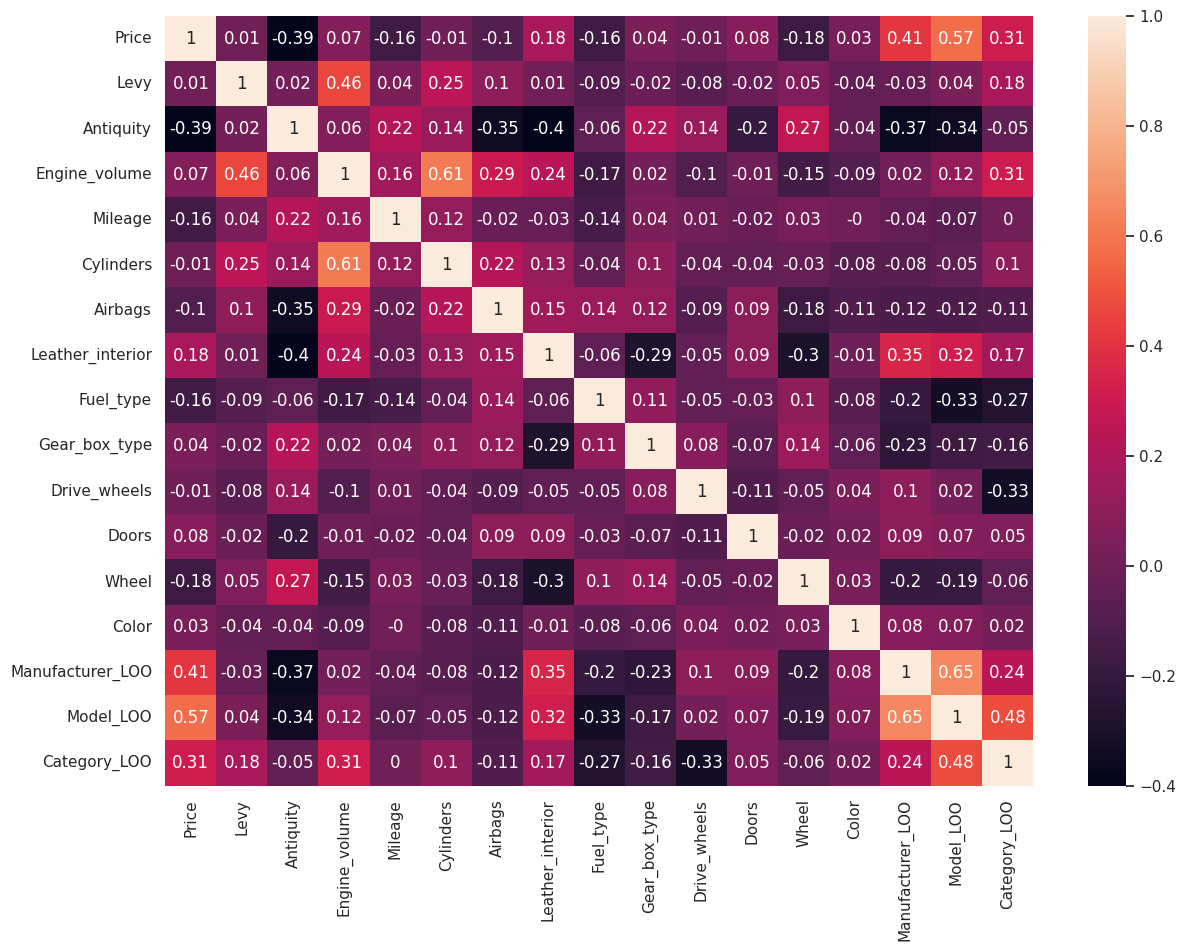

In [73]:
# Guardamos solo las columnas numéricas (que deberían ser todas)
columnas_numericas = DfLOO.select_dtypes(exclude=['object', 'category'])

# Generamos la amtriz de correlación
matriz_corr = columnas_numericas.corr().round(2)

#Estética
plt.figure(figsize=(14 , 10))
sns.heatmap(matriz_corr, annot=True)
plt.show()

Podemos ver que luego del encoing las features con las que mayor correlación tiene la variable objetivo son aquellas que tratamos con LeaveOneOut, por lo tanto, tendremos que verificar si el modelo está sesgado, lo que daría lugar a overfitting.

### 🌈 Modelado 2


In [74]:
#Guardamos la feature objetivo a predecir
y=DfLOO["Price"]

#Dropeamos la columna price del dataframe principal
X=DfLOO.drop(columns=["Price"])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


#### 👀 Búsqueda mejor modelo a aplcar

In [75]:
#Diccionario para almacenar los resultados del entrenamiento
resultados2 = {'Algoritmo': [], 'R2': [], 'RMSE': []}

In [76]:
#Creamos un diccionario con nombre y la función del respectivo modelo
modelos = {
    'LinearR': LinearRegression(),
    'DecisionTreeR': DecisionTreeRegressor(),
    'RandomForestR': RandomForestRegressor(n_estimators=100),
    'GradientBoostingR': GradientBoostingRegressor(),
    'XGBR': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=27),
    'LGBMR': lgb.LGBMRegressor(random_state=42)
}


In [77]:
for nombre, modelos in modelos.items():

    #Utilizamos la misma función declarada en el modelado nro 1
    r2, RMSE = modelado(modelos, X_train, X_test, y_train, y_test)

    # Apendeamos los valores al diccionario que hicimos
    resultados2['Algoritmo'].append(nombre)
    resultados2['R2'].append(r2)
    resultados2['RMSE'].append(RMSE)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1306
[LightGBM] [Info] Number of data points in the train set: 10216, number of used features: 16
[LightGBM] [Info] Start training from score 16008.727193


In [78]:
resultados_modelos = pd.DataFrame(resultados2)

#Visualizamos resultados
resultados_modelos

,Algoritmo,R2,RMSE
0,LinearR,0.475834,7806.156849
1,DecisionTreeR,0.975530,1686.629372
2,RandomForestR,0.990324,1060.617190
3,GradientBoostingR,0.956143,2257.987031
4,XGBR,0.973100,1768.383823
5,LGBMR,0.979795,1532.623092


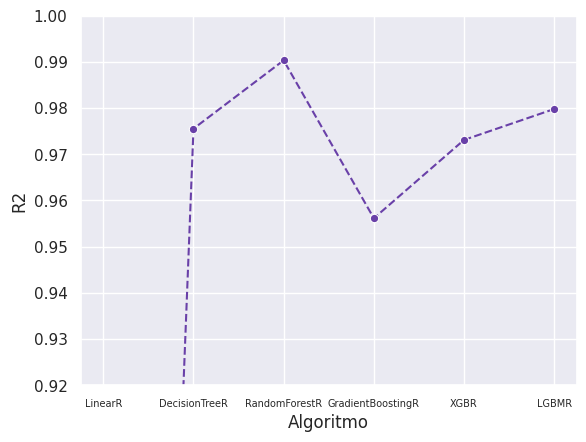

In [79]:
sns.lineplot(data=resultados_modelos,x='Algoritmo',y='R2',color='#6940A8', marker="o",linestyle='--')

# Estética del gráfico
plt.xticks(fontsize=7)

# Limitamos ya que el r2 es muy cercano entre los modelos
plt.ylim(0.92,1)

plt.show()

Se amplió el gráfico para poder tener una visibilidad más clara de que algoritmo es más efectivo para aplicar en el modelado.

Por lo graficado, el modelo que **mayor rendimiento** tuvo fue el **Random Forest Regressor** y ese se aplicará en el modelado para la predicción

#### ⚠️ Identificación Overfitting

K fold


In [80]:
kf = KFold(n_splits=5)

clf = RandomForestRegressor()

clf.fit(X_train, y_train)

score = clf.score(X_train, y_train)
print("R^2 del modelo en el conjunto de entrenamiento:", score)

scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="r2")
print("R^2 en validación cruzada:", scores)
print("Media de R^2 en validación cruzada:", scores.mean())

predicts = clf.predict(X_test)

mse = metrics.mean_squared_error(y_test, predicts)
print("Mean Squared Error en el conjunto de prueba:", mse)

r2_test = clf.score(X_test, y_test)
print("R^2 en el conjunto de prueba:", r2_test)

R^2 del modelo en el conjunto de entrenamiento: 0.9979277270481763
R^2 en validación cruzada: [0.97638378 0.98109456 0.98654112 0.97854157 0.98576487]
Media de R^2 en validación cruzada: 0.98166517718897
Mean Squared Error en el conjunto de prueba: 1133032.4545666014
R^2 en el conjunto de prueba: 0.990253763323629


La valicadión cruzada diió muy buenos resultados y podríamos decir que el modelo no está overfitteado. Esto se puede deducir viendo la cercanía entr el R^2 del test y el R^2 del train.

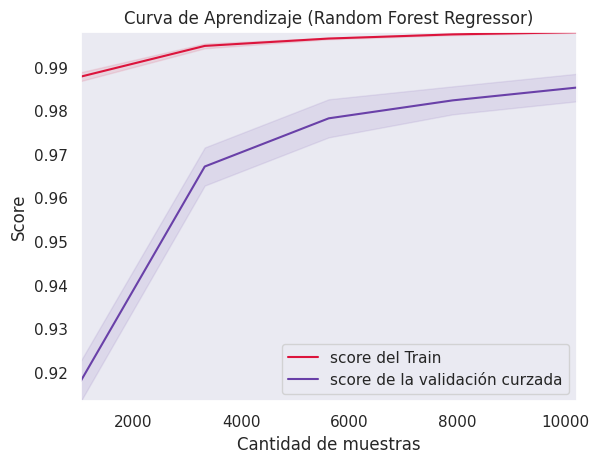

In [81]:
#Usamos la misma función del Modelado 1 para graficar la curva de aprendizaje

# creamos un modelo de regresión (se puede cambiar esto si quermos probar otro modelo)
modelo = RandomForestRegressor()

# Definimos los parámetros de la curva de aprendizaje
titulo = "Curva de Aprendizaje (Random Forest Regressor)"  # Título del gráfico
cv = KFold(n_splits=5)  # Definir la validación cruzada, se realizarán 5 pruebas en muestras de 1/5
n_jobs = -1  # Usar todos los núcleos de CPU disponibles


# Trazamos la curva de aprendizaje
graficar_curva_aprendizaje(modelo, titulo, X, y, cv=cv, n_jobs=n_jobs)
plt.margins( x=0, y=0, tight=True)
plt.show()

No se identificó un overfitting claro ya que la validación cruzada dió muy buenos resultados y la curva de aprendizaje del modelo tiene mucha cercanía entre el train y la validación.

####〽️ Modelado predicción

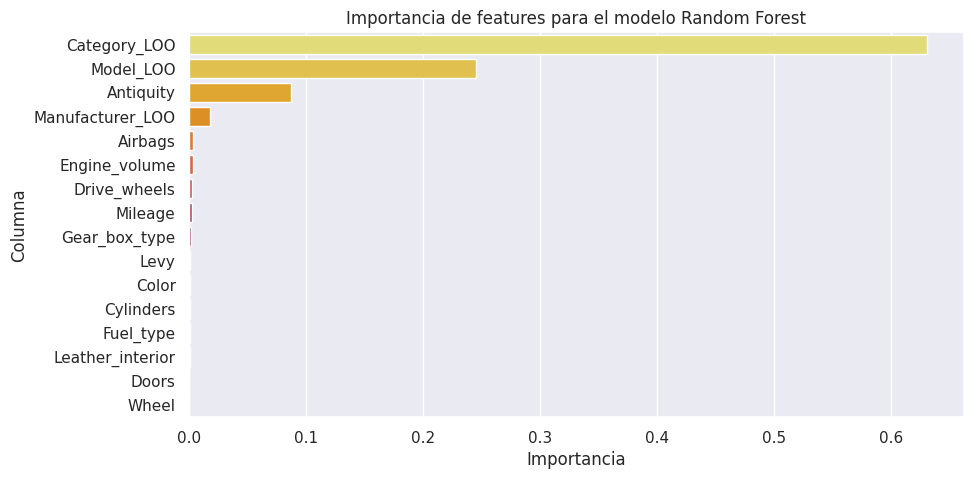

In [82]:
#FUnción similar a la anterior, pero que nos devuelve el modelo en sí
def modelo_entrenado(modelo, X_train, X_test, y_train, y_test):
    modelo_entrenado = modelo.fit(X_train, y_train)
    y_pred = modelo_entrenado.predict(X_test)
    return modelo_entrenado, y_pred

# Aplicamos la función con RandomForestRegressor, modelo que mayor puntuación tuvo
modelo_final, y_pred = modelo_entrenado(RandomForestRegressor(n_estimators=100), X_train, X_test, y_train, y_test)

importancia_columnas = modelo_final.feature_importances_
nombre_columnas = X_train.columns

# Creamos un DataFrame con los nombres e importancias de las columnas
importancia_columnas_df = pd.DataFrame({'Columna': nombre_columnas, 'Importancia': importancia_columnas})

# las ordenamos de forma descendente
importancia_columnas_df = importancia_columnas_df.sort_values(by='Importancia', ascending=False)

# Seleccionamos las características más importantes
top_columnas = importancia_columnas_df.head(16)

#Graficamos
plt.figure(figsize=(10, 5))
sns.barplot(x='Importancia', y='Columna', data=top_columnas, palette='inferno_r')

# Estética del gráfico
plt.title('Importancia de features para el modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Columna')
plt.show()

  Pese a que las categorías tratadas tienen una fuerte influencia en el modelo, se probó el encoding LOO con otras columnas y no tuvieron mucha importancia, por lo tanto, se puede concluir que el encoding no fue sesgado y los datos fueron tratados correctamente.

  Se mantuvieron las columnas que mayor valor le aportaron al modelo.

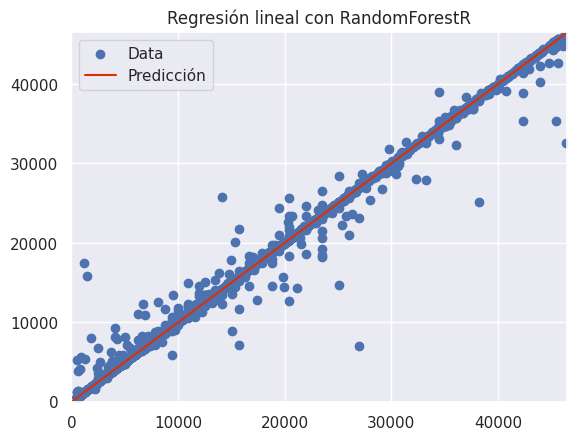

In [83]:
plt.scatter(y_test, y_pred, color='b', label='Data')

#Guardamos el valor más alto entre las predicciones y los datos reales
max_value = max(np.max(y_test), np.max(y_pred))

nombre_mejor_modelo = resultados_modelos.loc[resultados_modelos['R2'].idxmax(), 'Algoritmo']

#Ploteamos la línea de predicción desde 0 hasta el valor máximo
plt.plot([0, max_value], [0, max_value], color='#de2e03', label='Predicción')

#Estética
plt.title(f'Regresión lineal con {nombre_mejor_modelo}')
plt.margins( x=0, y=0, tight=True)
plt.legend()


plt.show()

A diferencia del 1er intento, se puede ver que la predicción es mucho más precisa respecto a los datos. Pese a tener algunos valores que se escapan, la predicción está mucho más refinada con este método de encoding.

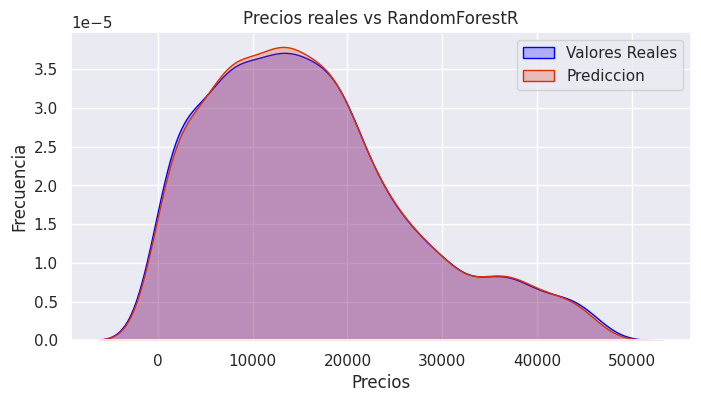

In [84]:
# Identificamos el modelo con el mejor valor de R2
nombre_mejor_modelo = resultados_modelos.loc[resultados_modelos['R2'].idxmax(), 'Algoritmo']

# Creamos un DataFrame para la comparación entre la predicción con los datos reales
comparativa = pd.DataFrame({'Real': y_test, 'Prediccion': y_pred})

# Graficamos para mostrar la diferencia entre los precios reales y la predicción
plt.figure(figsize=(8, 4))
# Graficamos valores reales
sns.kdeplot(data=comparativa, x='Real', label='Valores Reales', fill=True, common_norm=False, color='blue')
# Graficamos la predicción hecha por el modelo con mayor R2
sns.kdeplot(data=comparativa, x='Prediccion', label='Prediccion', fill=True,common_norm=False, color='#de2e03')

#Estética / labels
plt.title(f'Precios reales vs {nombre_mejor_modelo}')
plt.xlabel('Precios')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Y nuevamente, como se esperaba, la predicción es mucho más precisa respecto al 1er modelado.

###🏁 Conclusión

Se concluye que el 2do intento tuvo un rendimiento excelente (R^2 test: 0.98 , R^2 train: 0.99) para predecir los valores y superó con creces al 1er Intento de modelado (0.8 R2).

Se utilizó kfold para hacer una validación cruzada y comprobar que el modelo no estuviese overfitteado y las pruebas dieron buenos resultados, por lo que este modelo es el mejor para predecir estos datos y cualquiera que se les agregue con los mismos parámetros.

Objetivos demostrados:
- Se pudo comprobar que la predicción está mucho más refinada y puede predecir con bastante exactitud el precio de un auto dependiendo sus características.

- Se pudo demostrar qué variables son improtantes para la predicción en este modelado. Estas son: `'Category_LOO', 'Model-LOO', 'Antiquity', y 'Manufacturer_LOO'`

    Pese a que la mayoría de las columnas que se trataron con el encoding resultaron tener una gran participación en la importancia de features del modelo, se pudo probar que estas fueron las columnas que mejores resultados dieron y que el modelo no está sesgado.

- Se pudo ver que `'Airbags'` dentro de las características físicas del auto es la variable que más afecta al precio, pero no en gran medida.

- Se encontraron relaciones Medianamente claras gracias a la matriz de correlación. Se pueden destacar las siguientes relaciones en el dataframe:
1. `'Price'`:
  1. `'Price'` con `'Model_LOO'` = 0.57
  2. `'Price'` con `'Manufacturer_LOO'` = 0.41
  3.  `'Price'` con `'Category_LOO'` = 0.31
  4. `'Price'` con `'Leather_interior'` = 0.18
---

2. `'Engine_volume'`:
  1. `'Engine_volume'` con `'Cylinders'` = 0.61
  2. `'Engine_volume'` con `'Levy'` = 0.46
  3. `'Engine_volume'` con `'Airbags'` = 0.29


  Se dejaron las relaciones más relevantes respecto a la variable objetivo (`'Price'`) y otras en las que se puede encontrar una correlación logica entre variables.

## 👑 Conclusiones Finales


El modelo es perfectamente funcional para predecir con una exactitud del 99% con los datos ingresados con un error absoluto de 33 dólares.

Fue muy importante la limpieza preliminar y busqueda de outliers para un deployment correcto del modelo.

Se vió un gran cambio con los diferentes encodings, siendo el que mayor rendimiento dió el LeaveOneOut. Se pudo demostrar que el modelo no está sesgado ni overfitteado. Pese a que las features más importantes hayan sido aquellas que se encodearon, se probó encodear diferentes features y estas no tenían un impacto significativo en el modelo, por lo tanto, solo se quedaron las columnas más útiles.



Finalmente, en promedio, la predicción tiene un error absoluto de ± 33usd (√1061).

## ☕ Comentarios Finales

Fueron meses de trabajo duro, casi arrancando de cero en cuanto a conocimientos e independientemente de las clases dadas en el bootcamp (que sirvió de introducción a los temas) este proyecto tiene MUCHAS horas de trabajo autodidacta por detrás.

Este es mi 1er proyecto "bien hecho" así que apreciaría cualquier feedback para poder aprender más de lo que ya he aprendido experimentando con este trabajo.